In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
from cmocean import cm

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [4,4]
mpl.rcParams['figure.dpi'] = 350
mpl.rcParams['savefig.dpi'] = 350

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

In [2]:
def reg_mean_3D(var, tarea, mask, region_num):
    var = np.ma.masked_invalid(var)

    ave = np.zeros([var.shape[0], var.shape[1]])
    
    for t in np.arange(var.shape[0]):
        for d in np.arange(var.shape[1]):
            temp = np.ma.masked_where(~(mask==region_num),var[t,d,:,:])
            temp_tarea = np.ma.masked_where(~(mask==region_num), tarea)
            ave[t,d] = np.ma.average(temp, weights = temp_tarea)
    return ave

def reg_mean_2D(var, tarea, mask, region_num):
    var = np.ma.masked_invalid(var)
    
    ave = np.zeros(var.shape[0])
    
    for t in np.arange(var.shape[0]):
        temp = np.ma.masked_where(~(mask==region_num),var[t,:,:])
        temp_tarea = np.ma.masked_where(~(mask==region_num), tarea)
        ave[t] = np.ma.average(temp, weights = temp_tarea)
    return ave

#assumes data starts in january
# assumes data is 2D
def annual_mean_june(var,nyears):
    var_annual = np.zeros((nyears))
    for y in range(0,nyears):
        var_annual[y] = var[(y*12+6):(y*12+18)].mean()
        
    return var_annual

In [3]:
path = '/glade/u/home/chsharri/Work/NW/'

from scipy.io import loadmat
mask = loadmat('/glade/u/home/vgarza/NW/ocean impacts/Reg_Masks.mat')
SP_Atlantic = mask['SP_Atlantic']
# N_Atlantic = mask['N_Atlantic']
# Reg_Mask = mask['Reg_Mask']
# ST_Atlantic = mask['ST_Atlantic']
# TLAT = mask['TLAT']
# TLONG = mask['TLONG']
TAREA = mask['TAREA']

SP_Atlantic = xr.DataArray(SP_Atlantic)
TAREA = xr.DataArray(TAREA)

scavenge__150 = xr.open_dataset(path+'nw_ur_150_07.pop.h.Fe_scavenge_rate.nc')

#CONTROLS
scavenge_cntrl_1 = xr.open_dataset(path+'nw_cntrl_03.pop.h.Fe_scavenge_rate.nc') # 25.5 years = 306


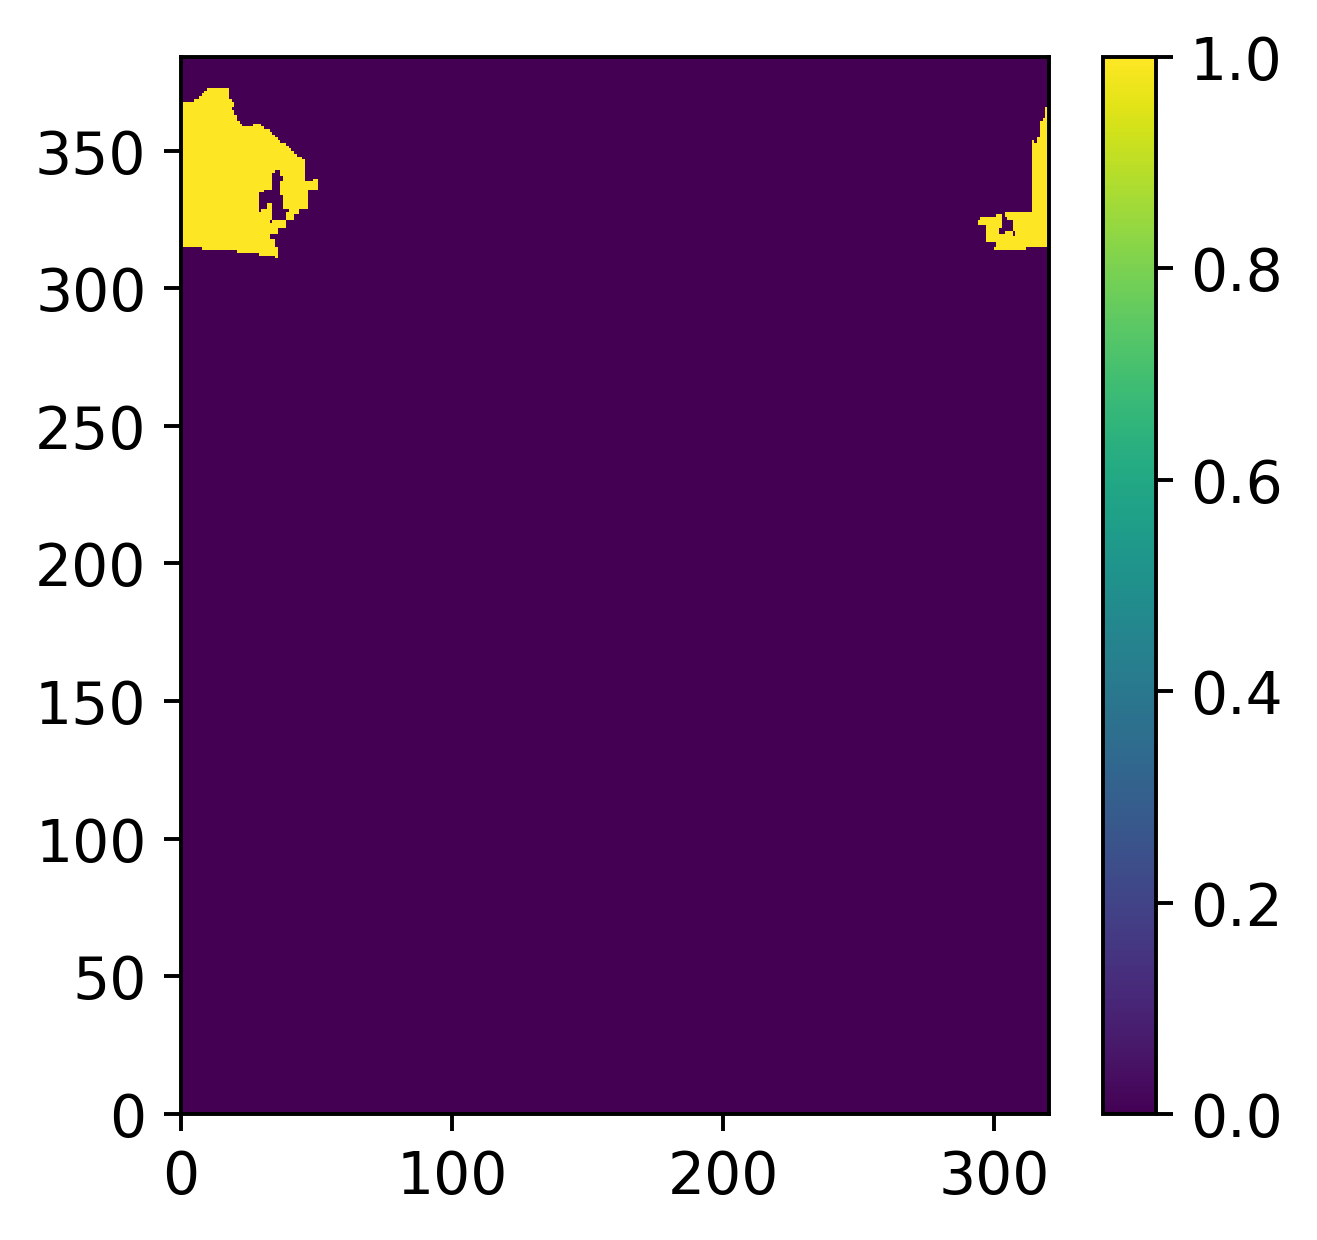

In [4]:
plt.pcolormesh(SP_Atlantic)
plt.colorbar()

In [5]:
dates_com = pd.date_range(start = '01/31/2018', end = '12/31/2034', freq='M')

# 2 years control plus 150 TG case
dates_full = pd.date_range(start = '01/31/2018', end = '12/31/2049', freq='M')

# same as above but yearly
dates_yr = pd.date_range(start = '12/31/2018', end = '12/31/2049', freq='Y')

# dates for long control run
dates_c = pd.date_range(start = '01/31/2016', end = '6/30/2046', freq='M')

# dates for 150 Tg
dates_UR = pd.date_range(start = '01/31/2020', end = '12/31/2049', freq='M')

In [6]:
dates_UR

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31',
               ...
               '2049-03-31', '2049-04-30', '2049-05-31', '2049-06-30',
               '2049-07-31', '2049-08-31', '2049-09-30', '2049-10-31',
               '2049-11-30', '2049-12-31'],
              dtype='datetime64[ns]', length=360, freq='M')

In [7]:
scavenge_cntrl_1

<xarray.Dataset>
Dimensions:           (d2: 2, nlat: 384, nlon: 320, time: 306, z_t: 60)
Coordinates:
  * time              (time) object 0001-02-01 00:00:00 ... 0026-07-01 00:00:00
  * z_t               (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
    TLONG             (nlat, nlon) float64 ...
    TLAT              (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound        (time, d2) object ...
    Fe_scavenge_rate  (time, z_t, nlat, nlon) float32 ...
Attributes:
    title:           nw_cntrl_03
    history:         Mon Jun 15 09:21:52 2020: ncrcat -v Fe_scavenge_rate nw_...
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2018-05-27 at 18:45:01.4
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0
    NCO:             netCDF Operators version 4.7.9 (Homepage = http://nco.sf...

In [8]:
#(scavenge__150.Fe_scavenge_rate.mean(axis=0)).min()

In [9]:
sr_150_global_mo =reg_mean_3D(scavenge__150.Fe_scavenge_rate,TAREA, SP_Atlantic, 1); 
sr_control_global_mo =reg_mean_3D(scavenge__150.Fe_scavenge_rate,TAREA, SP_Atlantic, 1); 

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Warning: converting a masked element to nan.
  # Remove the CWD from sys.path while we load stuff.
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Warning: converting a masked element to nan.
  # Remove the CWD from sys.path while we load stuff.
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Warning: converting a masked element to nan.
  # Remove the CWD from sys.path while we load stuff.
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Warning: converting a masked element to nan.
  # Remove the CWD from sys.path while we load stuff.
/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/py

In [12]:
np.nanmin(sr_150_global_mo.mean(axis =0))

0.14068096175431544

In [13]:
global_comb = np.concatenate((sr_control_global_mo[12*2:12*4],sr_150_global_mo), axis = 0)

In [14]:
dates_c[12*11]

Timestamp('2027-01-31 00:00:00', freq='M')

In [15]:
dates_UR[12*7]

Timestamp('2027-01-31 00:00:00', freq='M')

In [16]:
np.mean(sr_control_global_mo[(12*20):(12*21),:], axis = 0)

array([0.13339941, 1.73942488, 3.02039964, 3.6952833 , 4.03702028,
       4.13127335, 4.03648436, 3.82817841, 3.57957731, 3.31787175,
       3.04500771, 2.79204669, 2.55779568, 2.35805417, 2.1930806 ,
       2.05674397, 1.93686559, 1.84433325, 1.75554394, 1.67116295,
       1.60096362, 1.53157801, 1.4727434 , 1.4079476 , 1.35025123,
       1.29977261, 1.2450236 , 1.19594067, 1.14534852, 1.0928883 ,
       1.04104838, 0.9891628 , 0.93894752, 0.88673452, 0.83869282,
       0.79257256, 0.74664975, 0.7019121 , 0.65832557, 0.61538894,
       0.5760969 , 0.53965063, 0.50815255, 0.47955802, 0.45454105,
       0.43160145, 0.41071283, 0.39114448, 0.37129134, 0.35263516,
       0.3383316 , 0.33279329, 0.33127192, 0.33292176, 0.35296264,
       0.39515137, 0.47528591,        nan,        nan,        nan])

In [29]:
sr_control_global_mo[(12*4):,:]

array([[0.2344192 , 0.240485  , 0.2461376 , ...,        nan,        nan,
               nan],
       [0.2588751 , 0.278205  , 0.29692596, ...,        nan,        nan,
               nan],
       [0.26452747, 0.34945364, 0.42381548, ...,        nan,        nan,
               nan],
       ...,
       [0.12428717, 0.45208865, 0.73849394, ...,        nan,        nan,
               nan],
       [0.14349421, 0.29364902, 0.4265703 , ...,        nan,        nan,
               nan],
       [0.16417506, 0.25277824, 0.33181646, ...,        nan,        nan,
               nan]])

In [31]:
#assumes data starts in january
# assumes data is 2D
# var is time, depth, lat, lon
def annual_mean_3D(var,nyears):
    var_annual = np.zeros((nyears,var.shape[1]))
    for y in range(0,nyears):
        var_annual[y,:] = var[(y*12):(y*12+12),:].mean(axis = 0)      
    return var_annual

In [32]:
#from the removes the 4 years from the beginning
cntrl_yr = annual_mean_3D(sr_control_global_mo[(12*4):,:], 26)

In [54]:
dates_c = dates_c[(12*4):]

In [55]:
dates_UR = dates_UR[:(12*26)]

In [47]:
yr_150 = annual_mean_3D(sr_150_global_mo[:(12*26),:], 26)

In [48]:
yr_150.shape

(26, 60)

In [49]:
z_t = scavenge__150.z_t

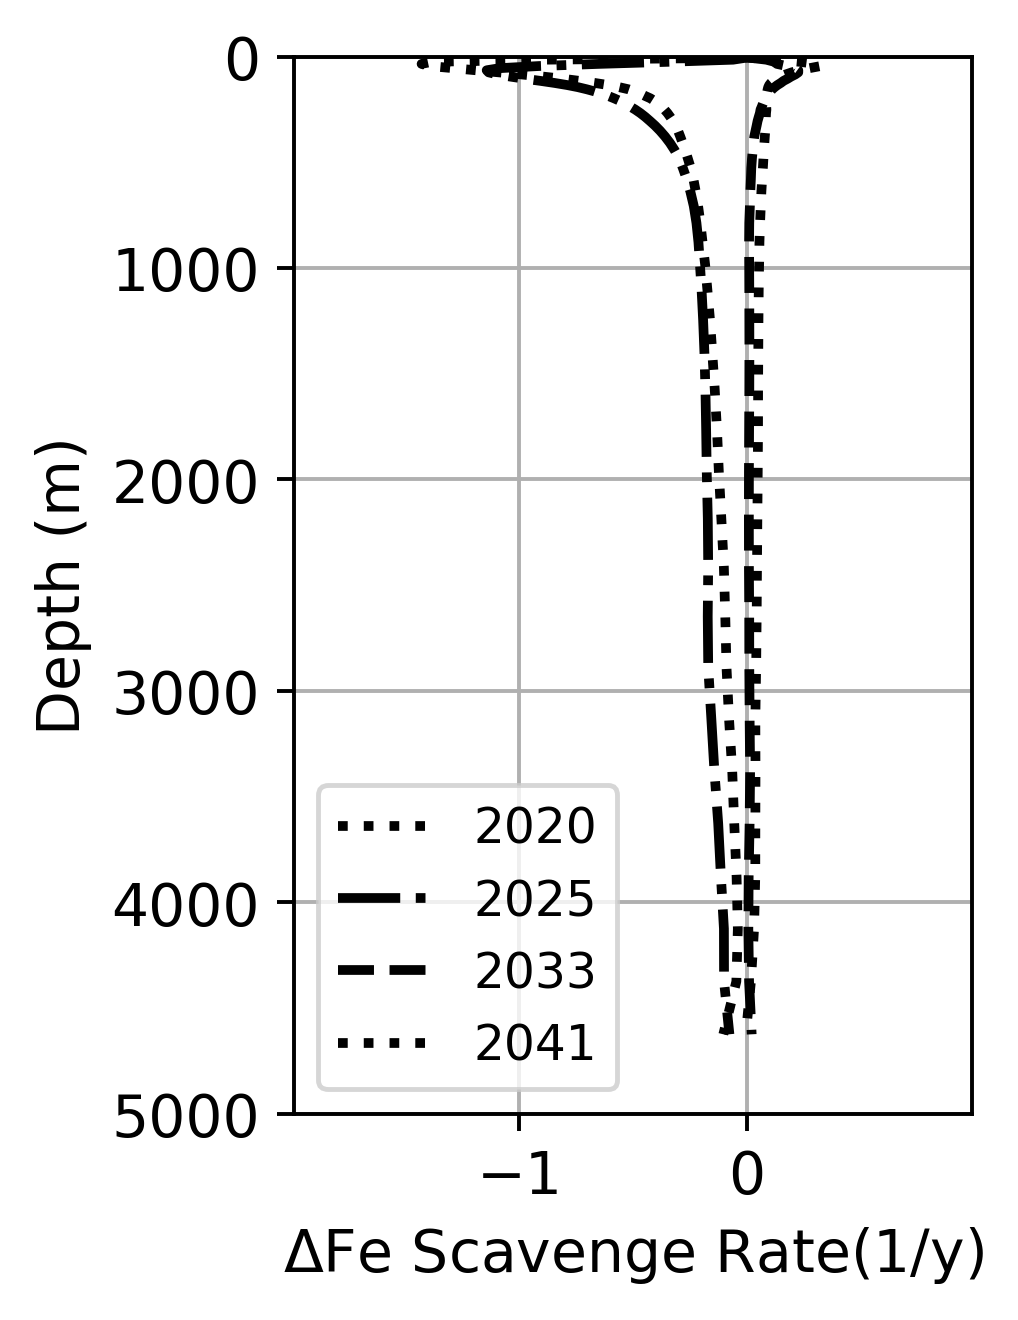

In [93]:
fig= plt.figure(figsize=(2.5,4),facecolor = 'w')


plt.plot(yr_150[0,:] - cntrl_yr[0,:] , z_t*0.01,'k:', label = '2020')
plt.plot(yr_150[5,:] - cntrl_yr[5,:] , z_t*0.01,'k-.', label = '2025')
plt.plot(yr_150[13,:] - cntrl_yr[13,:] , z_t*0.01,'k--', label = '2033')
plt.plot(yr_150[21,:] - cntrl_yr[21,:] , z_t*0.01,'k:', label = '2041')

plt.legend( loc='lower left',fontsize = '10')


plt.gca().invert_yaxis()
plt.grid()
plt.ylim([5000,0])
plt.xlim([-1.99,.99])
plt.ylabel('Depth (m)')
plt.xlabel('$\Delta$Fe Scavenge Rate(1/y)')



plt.show()

fig.savefig('/glade/work/vgarza/nw_figures/Delta Fe Scavenge 5000 meters, 20,25,33,41.jpg' , bbox_inches='tight')

plt.close()

i:  0
double check date: UR:  2020-01-31 00:00:00  C:  2020-01-31 00:00:00


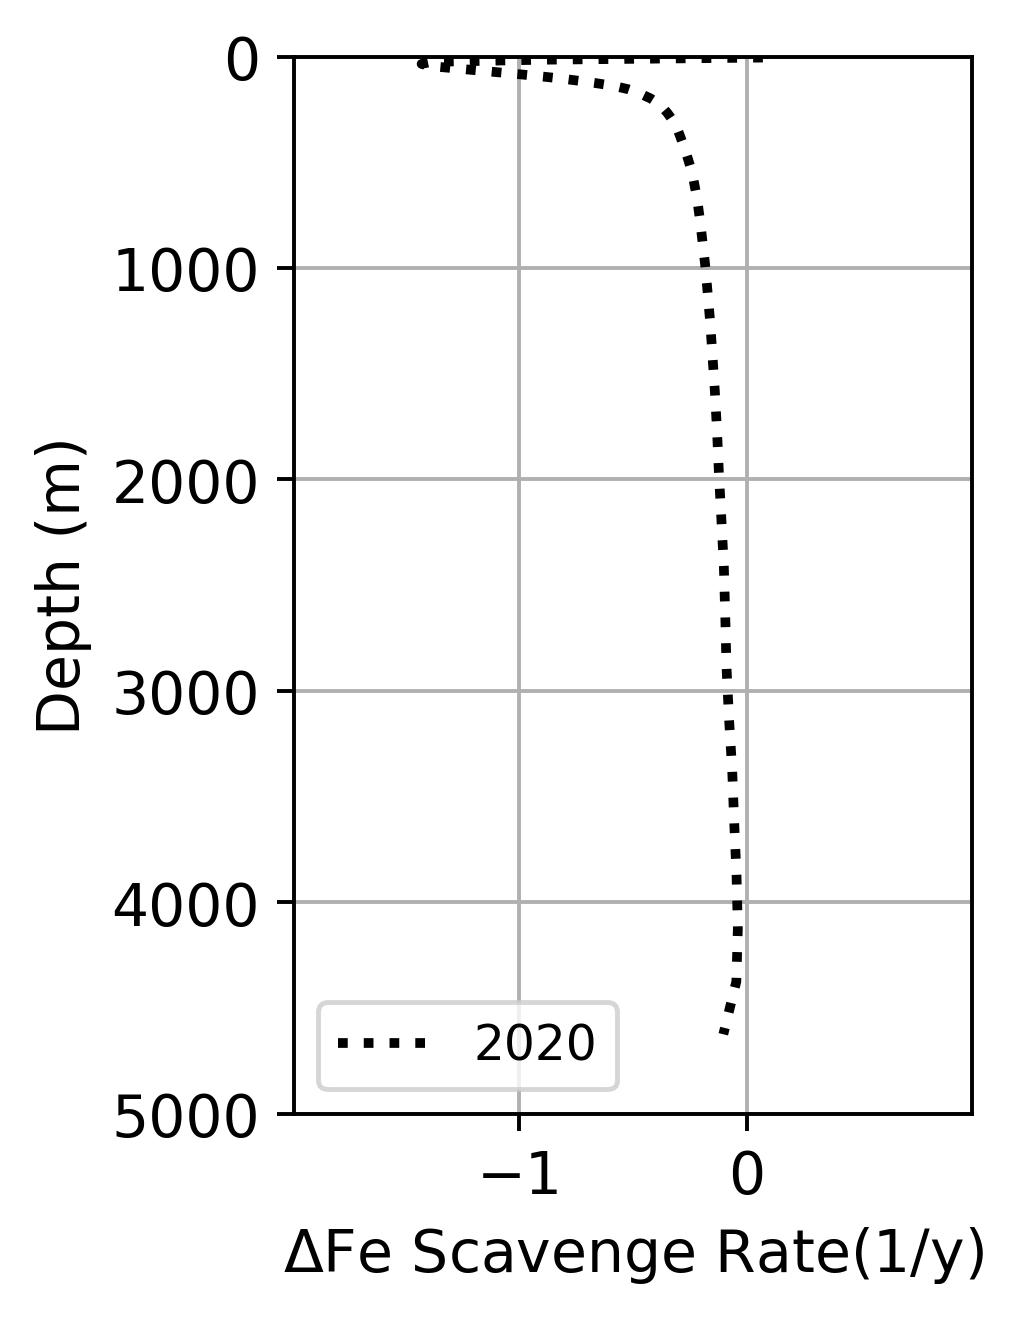

i:  1
double check date: UR:  2021-01-31 00:00:00  C:  2021-01-31 00:00:00


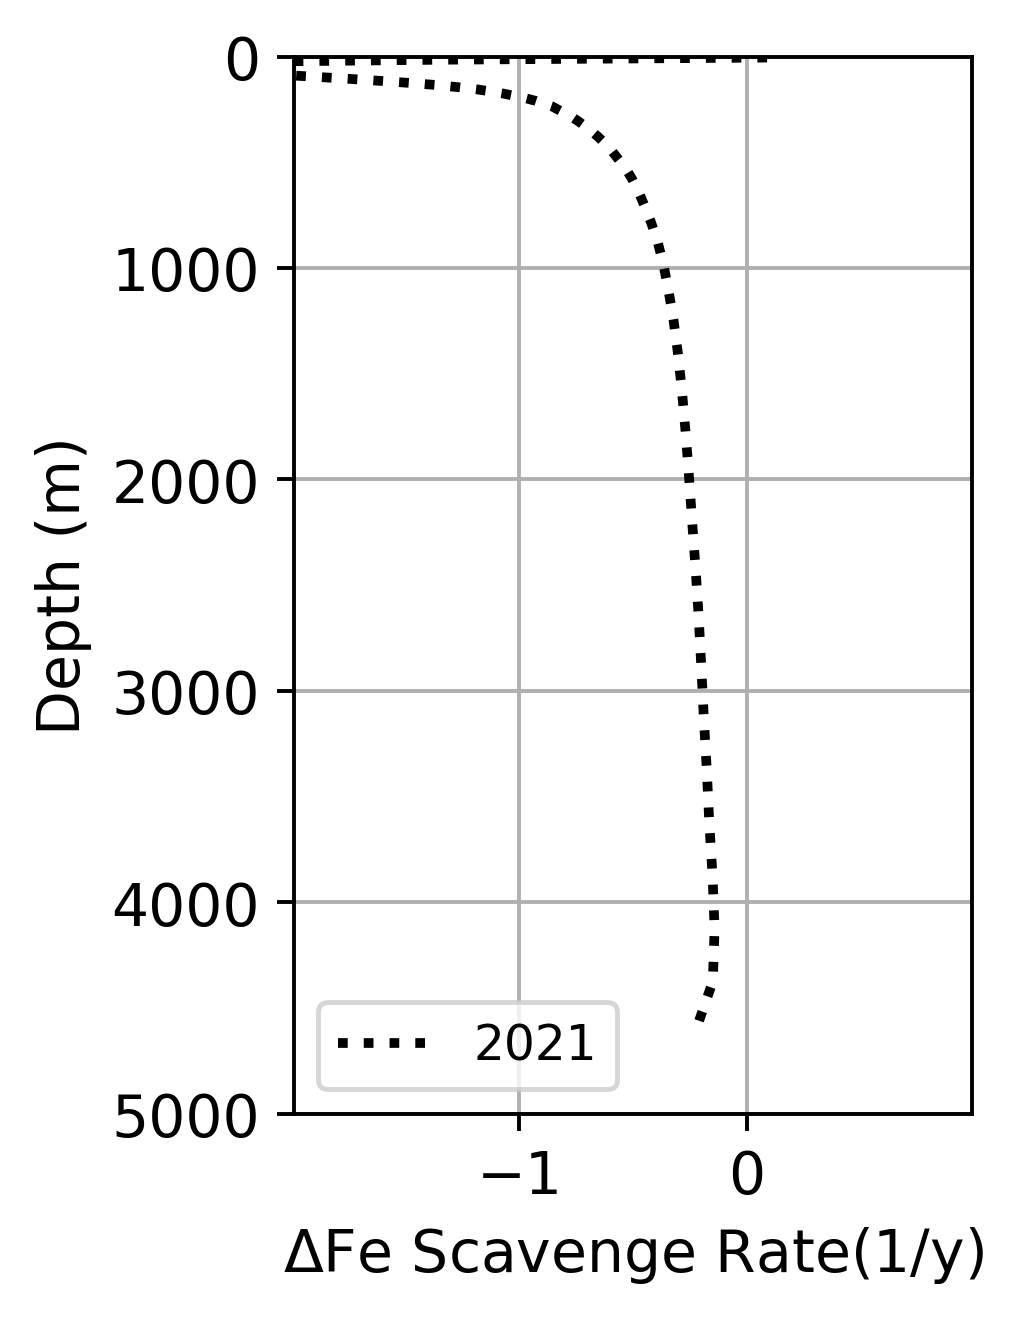

i:  2
double check date: UR:  2022-01-31 00:00:00  C:  2022-01-31 00:00:00


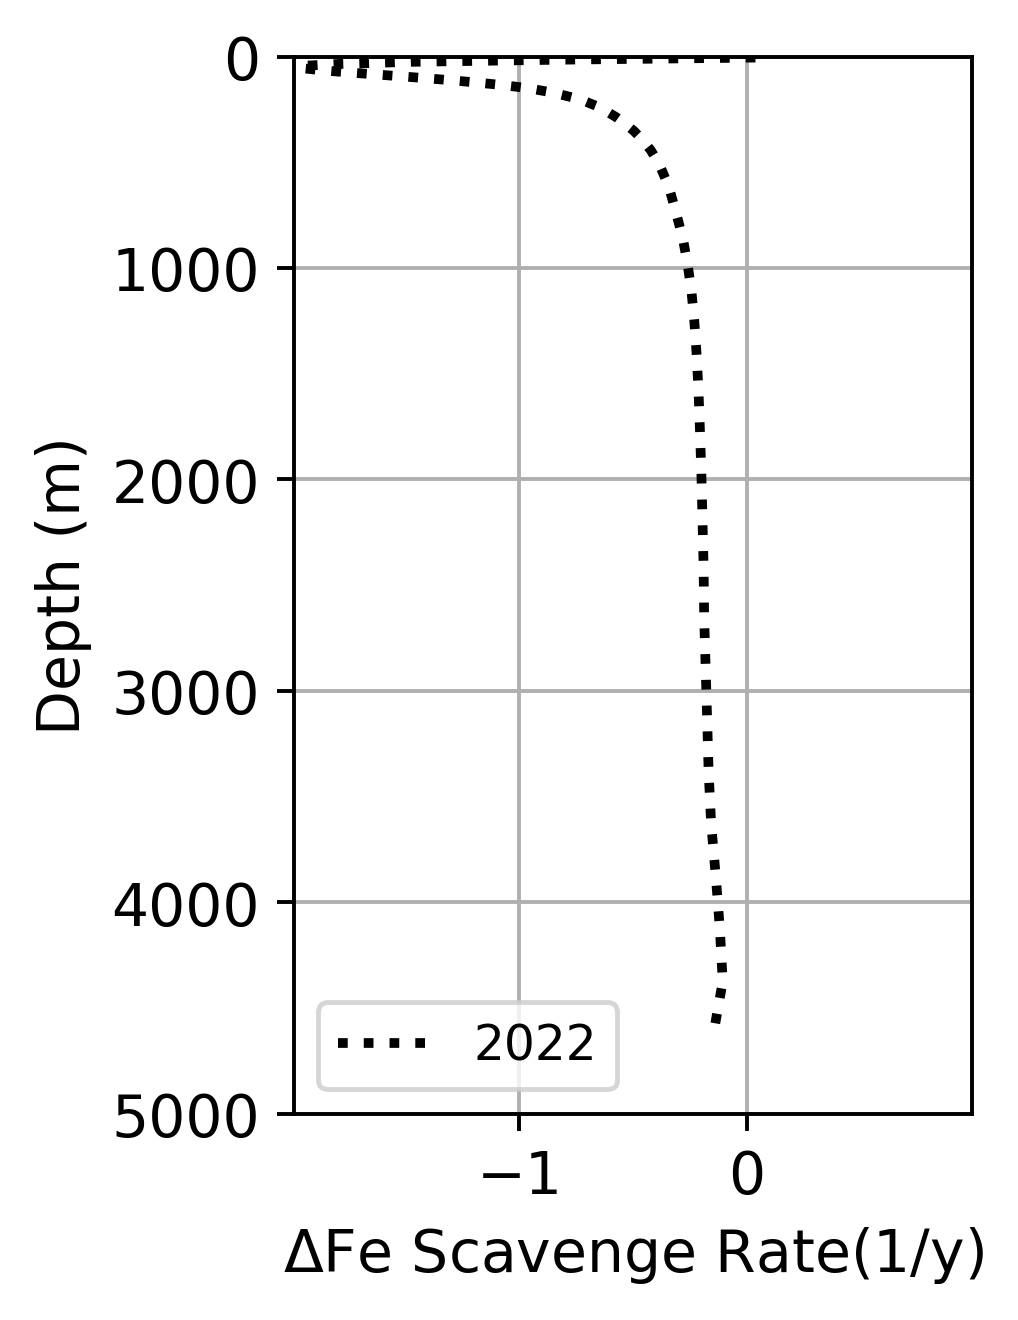

i:  3
double check date: UR:  2023-01-31 00:00:00  C:  2023-01-31 00:00:00


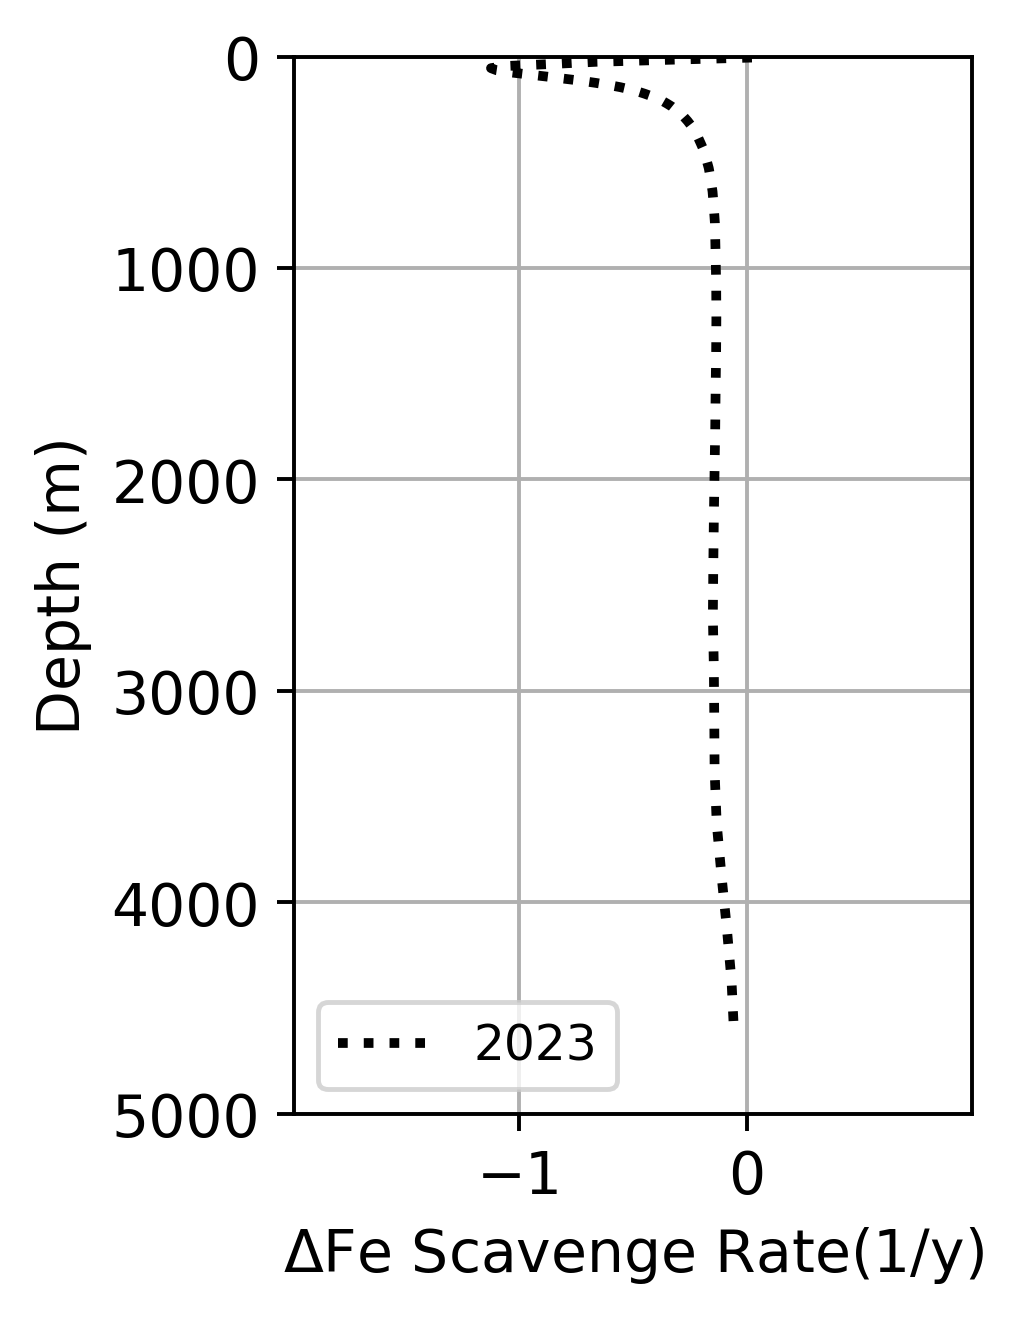

i:  4
double check date: UR:  2024-01-31 00:00:00  C:  2024-01-31 00:00:00


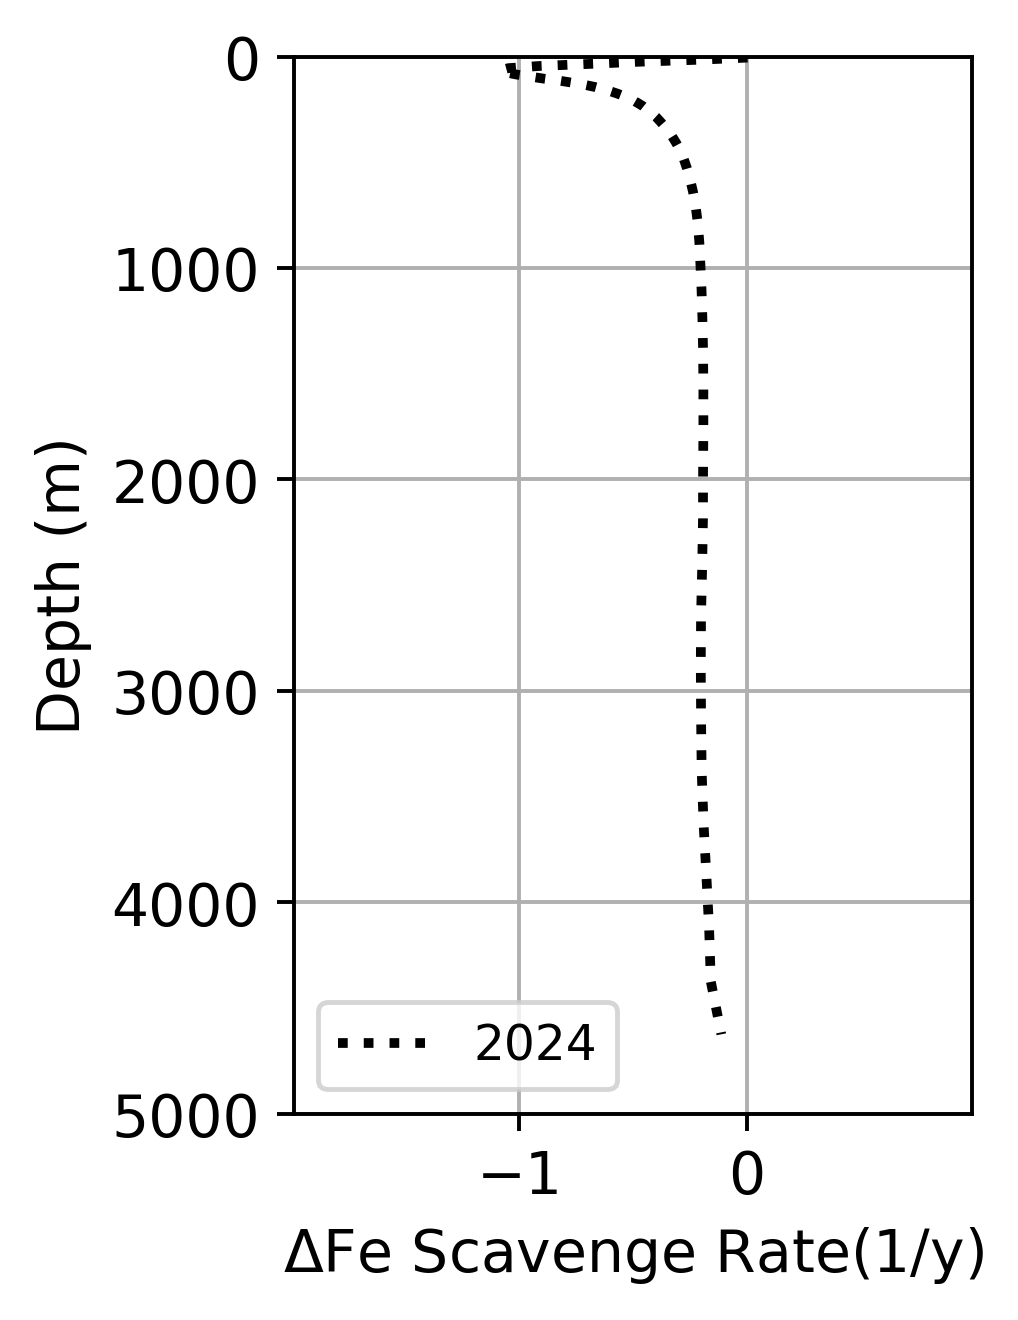

i:  5
double check date: UR:  2025-01-31 00:00:00  C:  2025-01-31 00:00:00


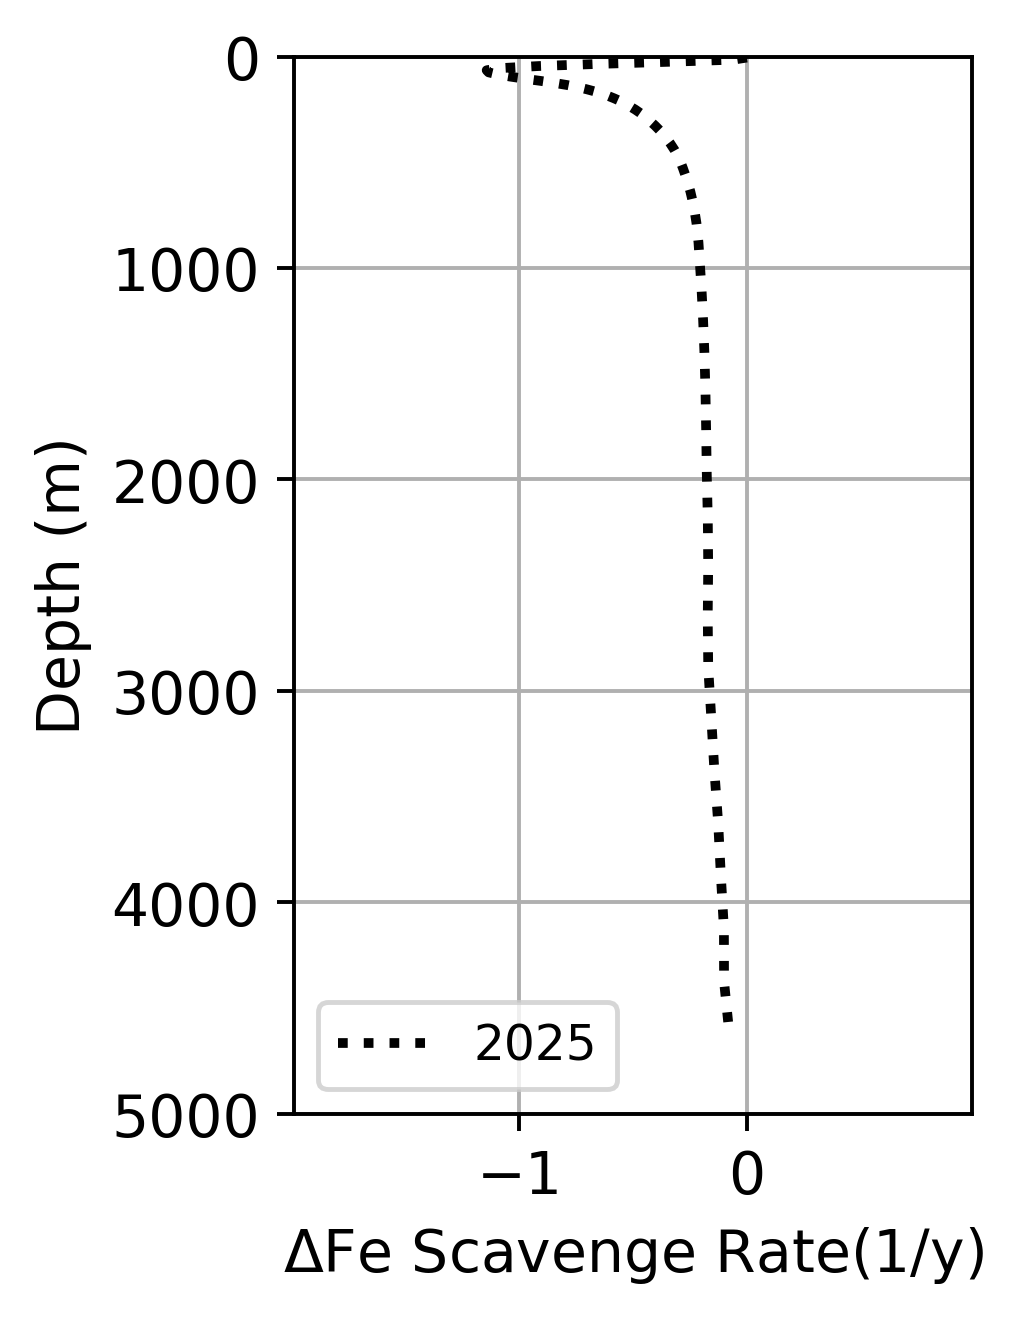

i:  6
double check date: UR:  2026-01-31 00:00:00  C:  2026-01-31 00:00:00


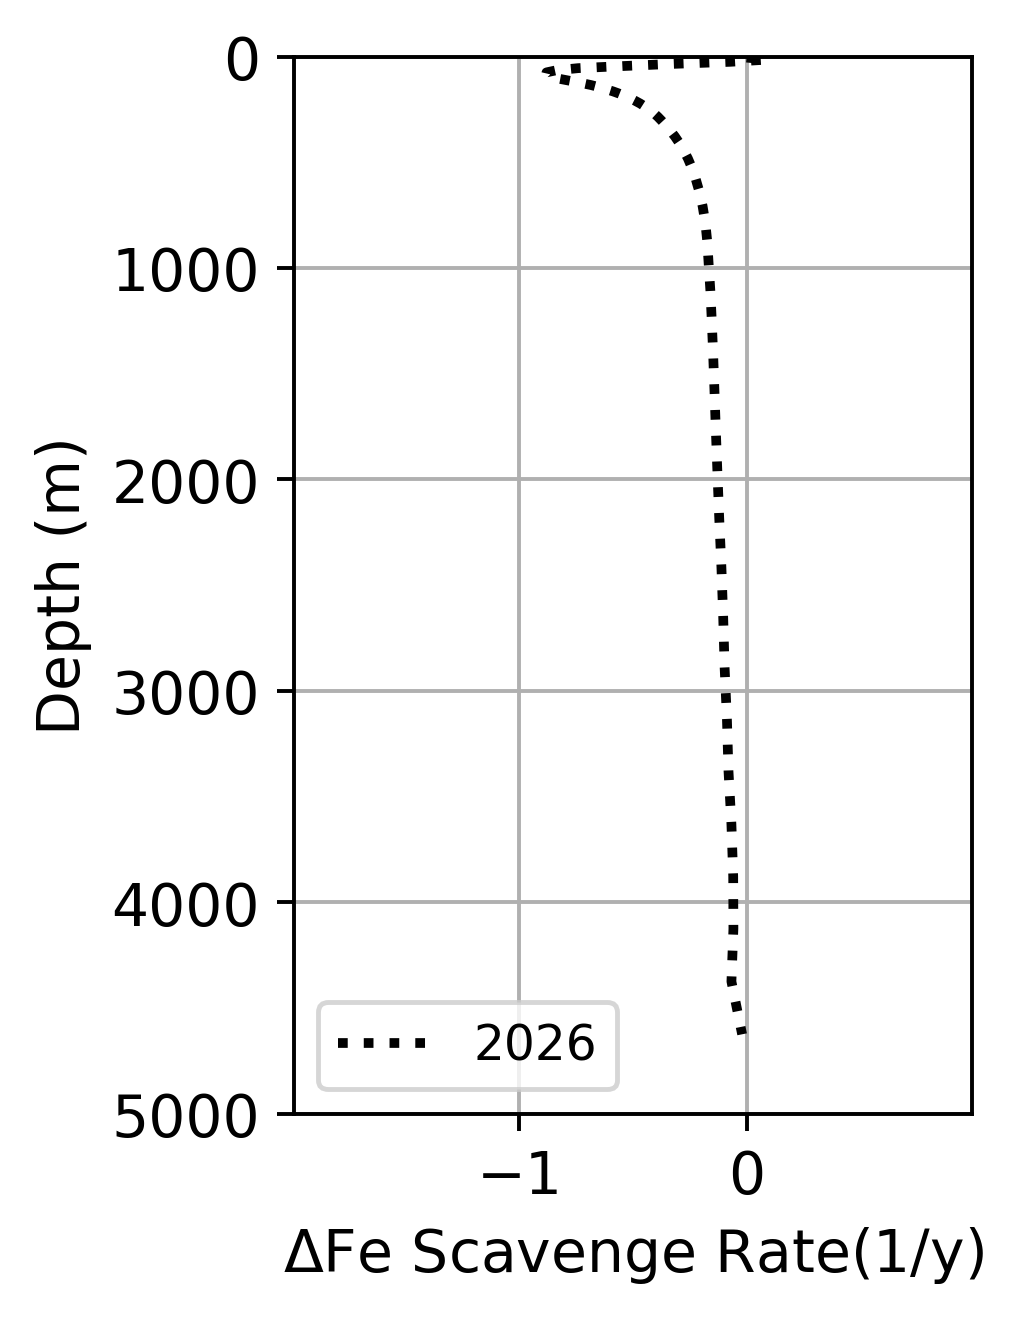

i:  7
double check date: UR:  2027-01-31 00:00:00  C:  2027-01-31 00:00:00


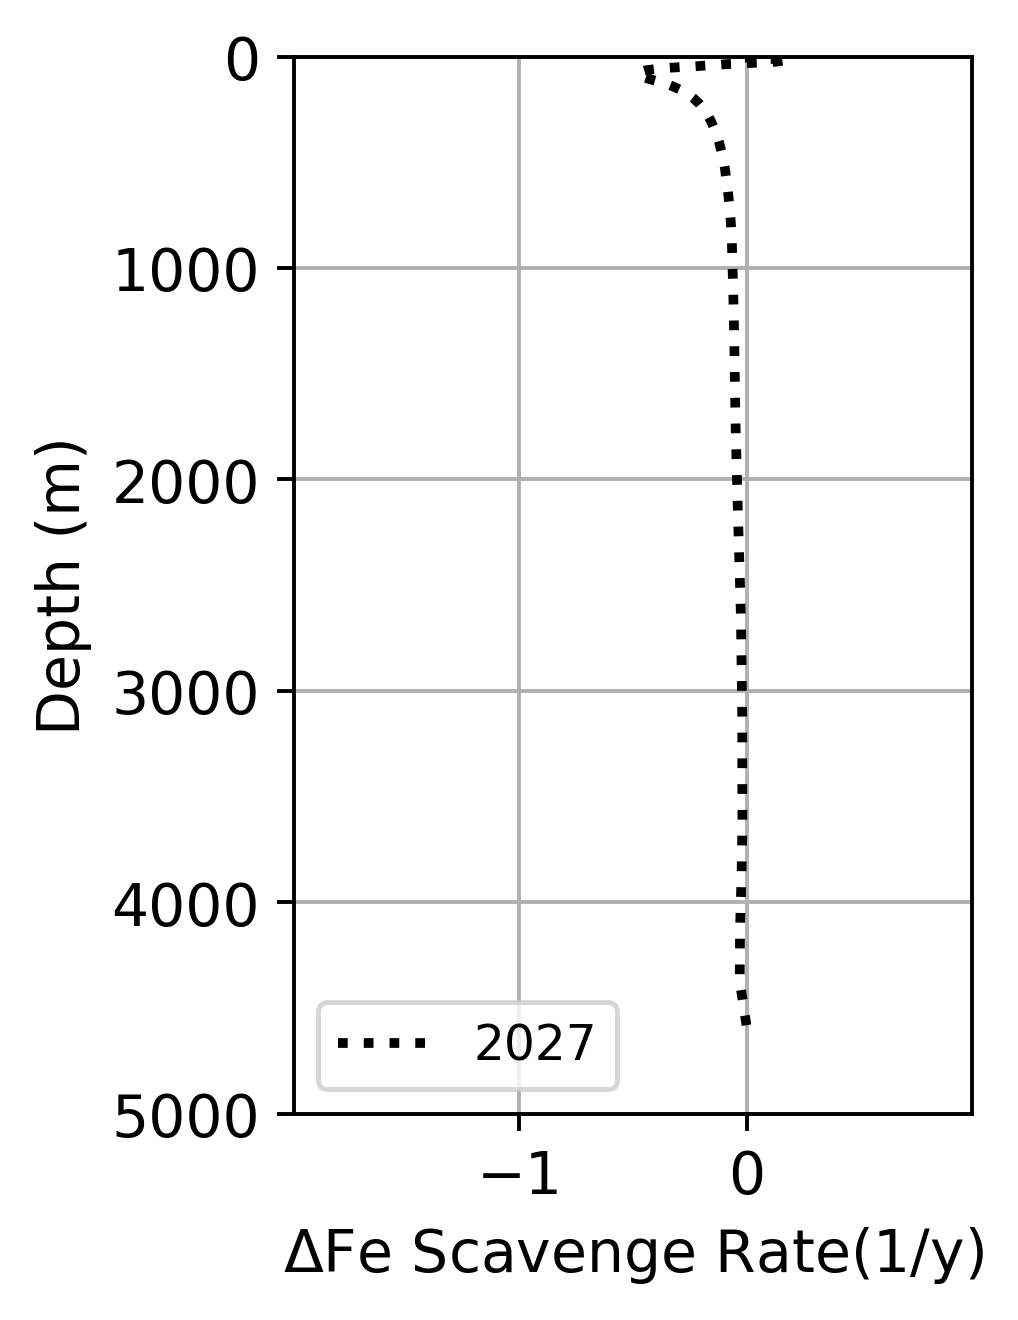

i:  8
double check date: UR:  2028-01-31 00:00:00  C:  2028-01-31 00:00:00


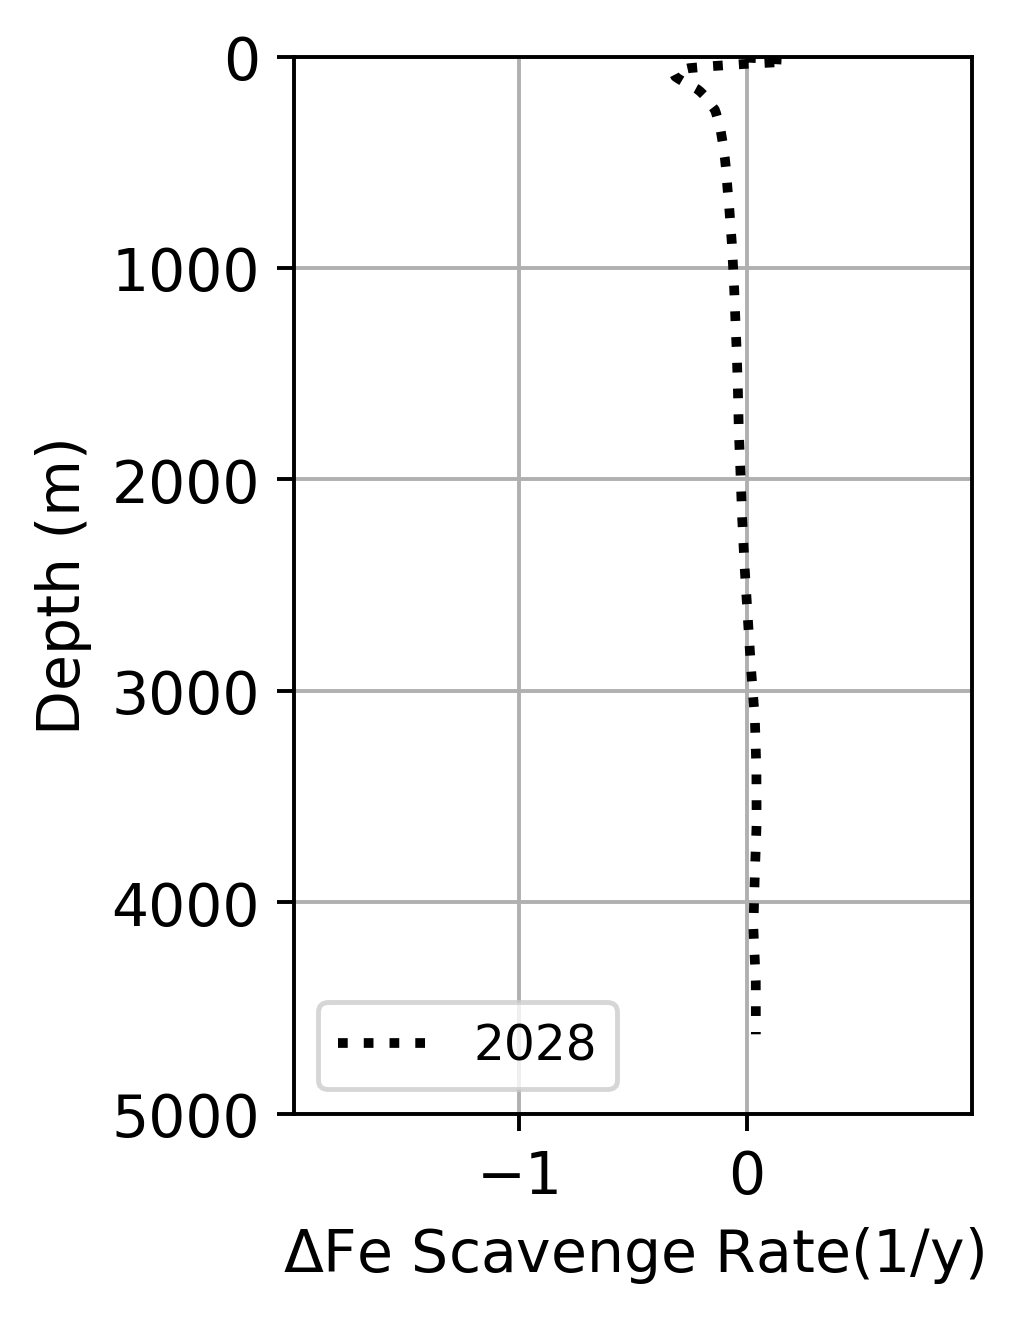

i:  9
double check date: UR:  2029-01-31 00:00:00  C:  2029-01-31 00:00:00


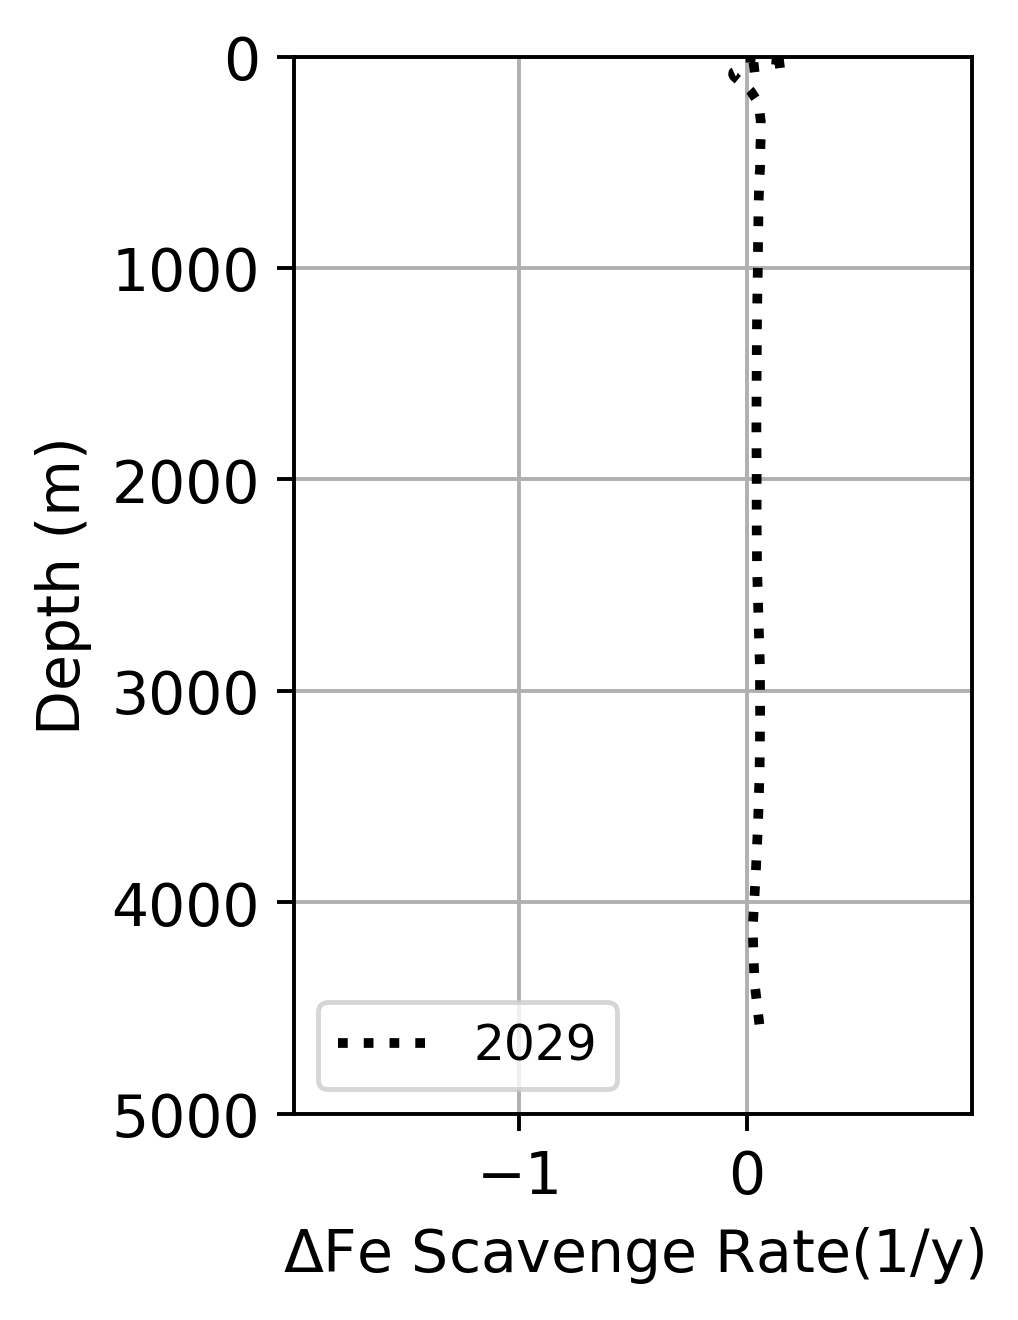

i:  10
double check date: UR:  2030-01-31 00:00:00  C:  2030-01-31 00:00:00


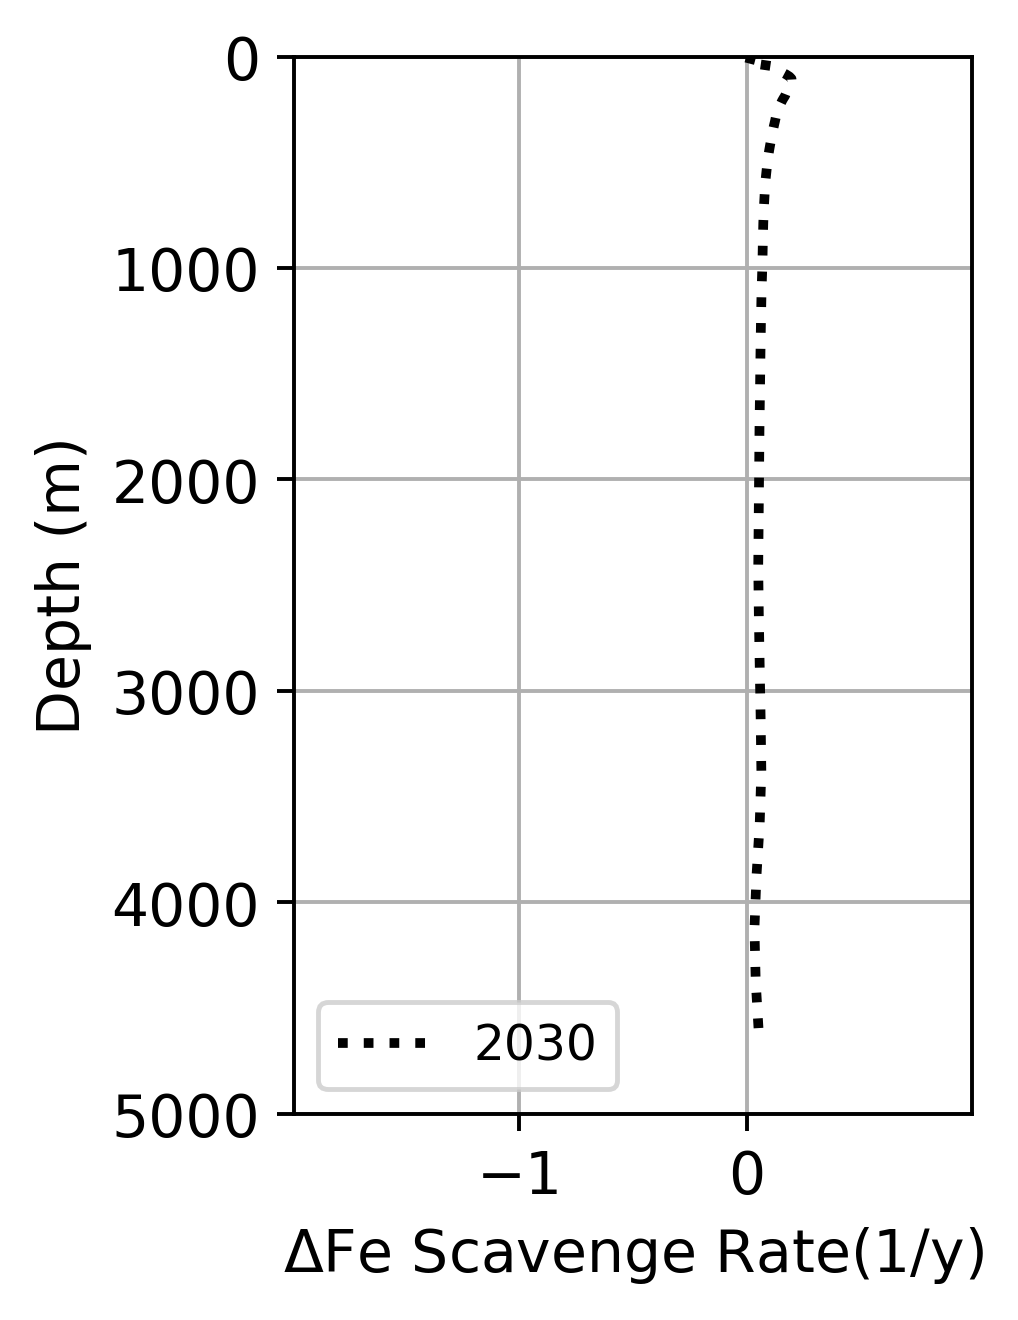

i:  11
double check date: UR:  2031-01-31 00:00:00  C:  2031-01-31 00:00:00


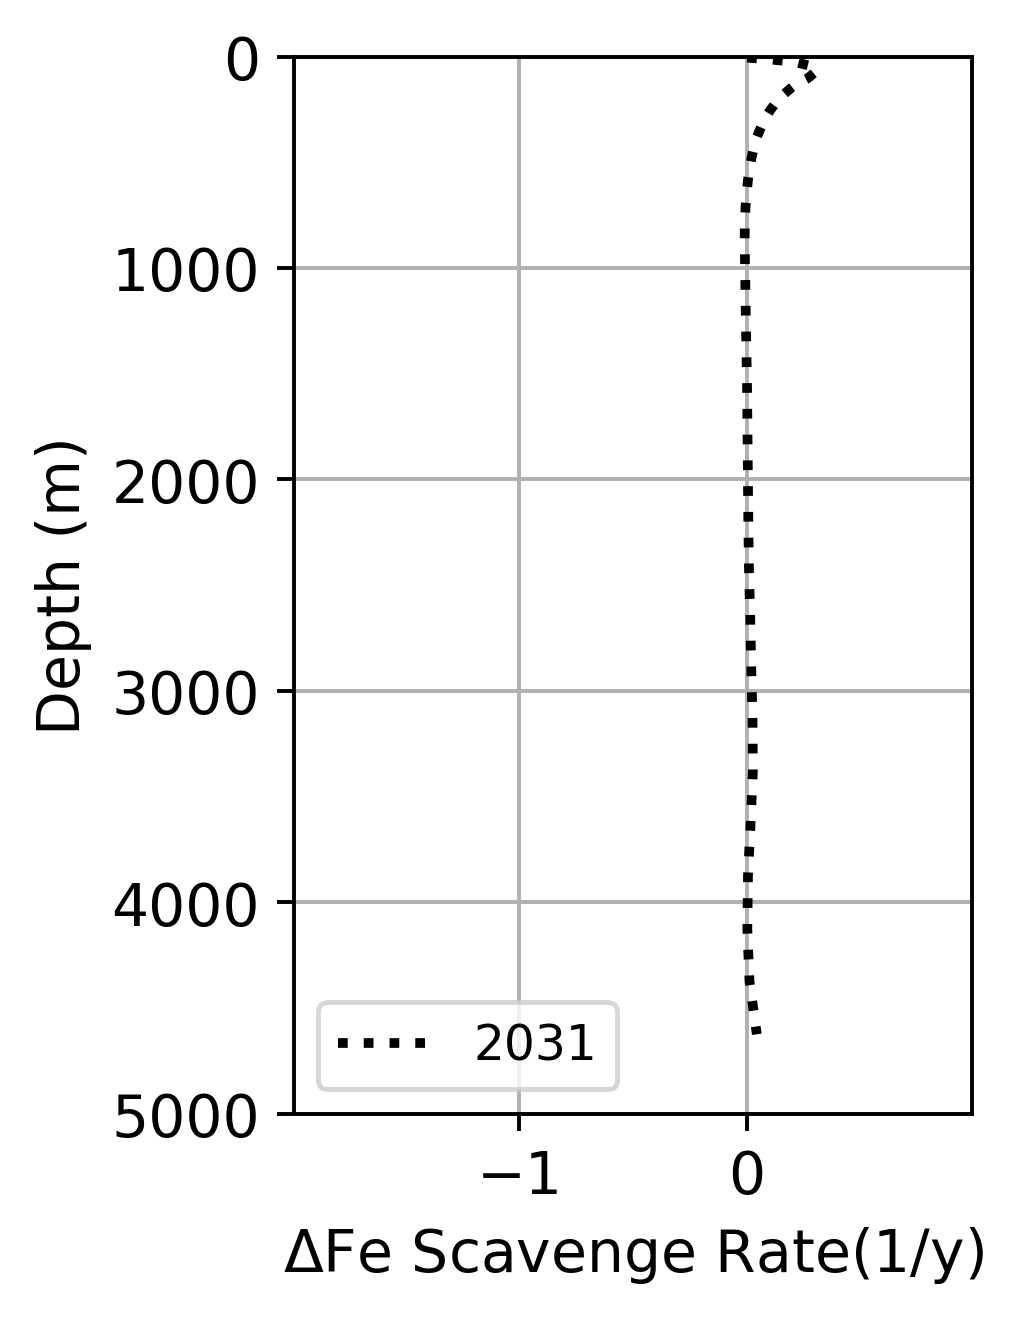

i:  12
double check date: UR:  2032-01-31 00:00:00  C:  2032-01-31 00:00:00


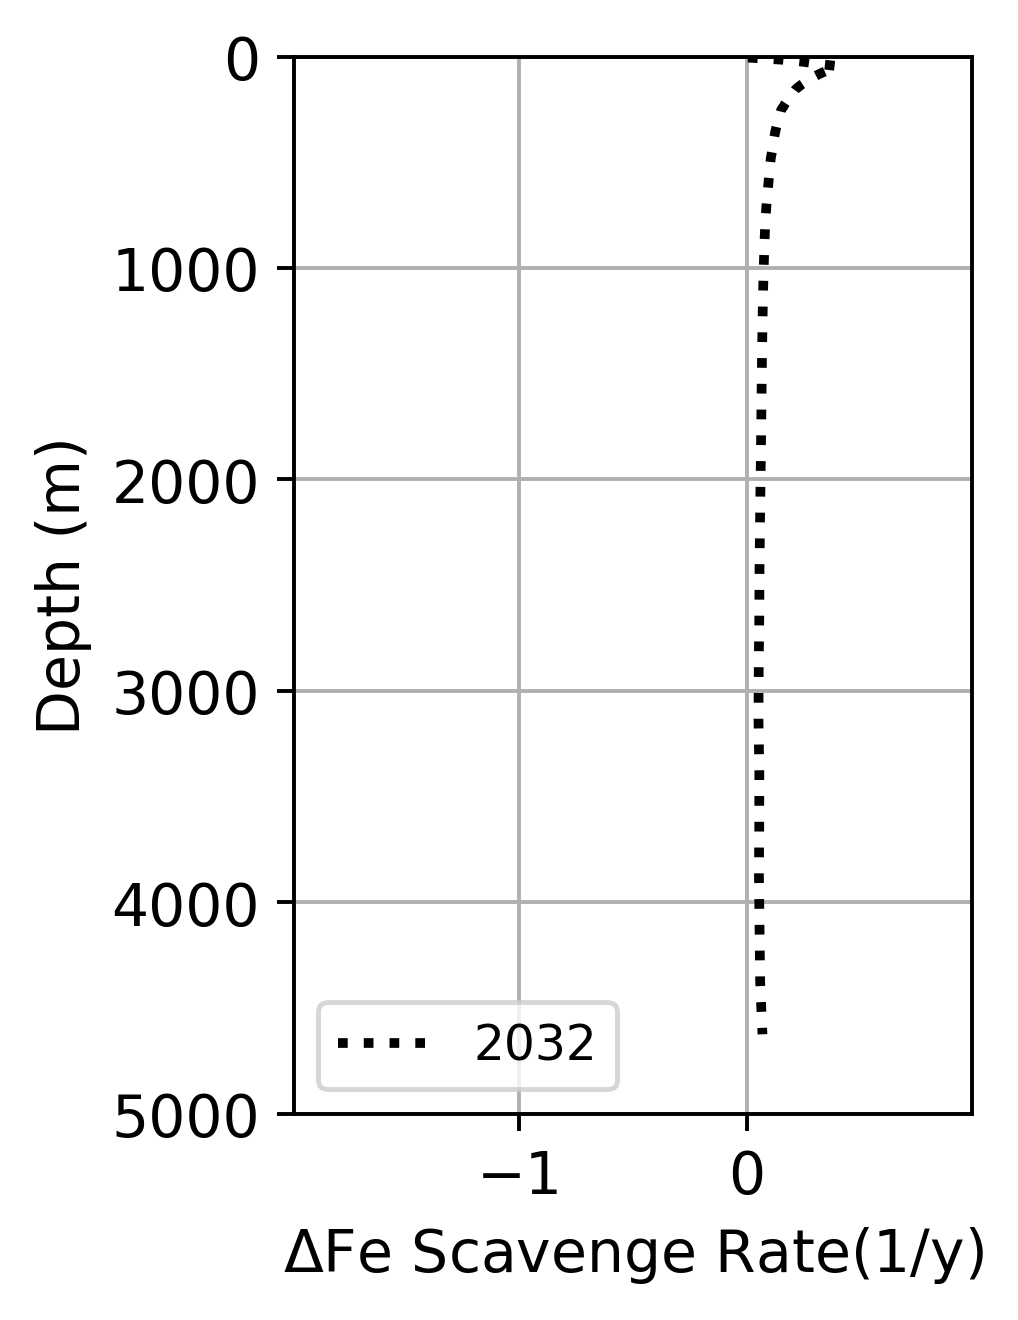

i:  13
double check date: UR:  2033-01-31 00:00:00  C:  2033-01-31 00:00:00


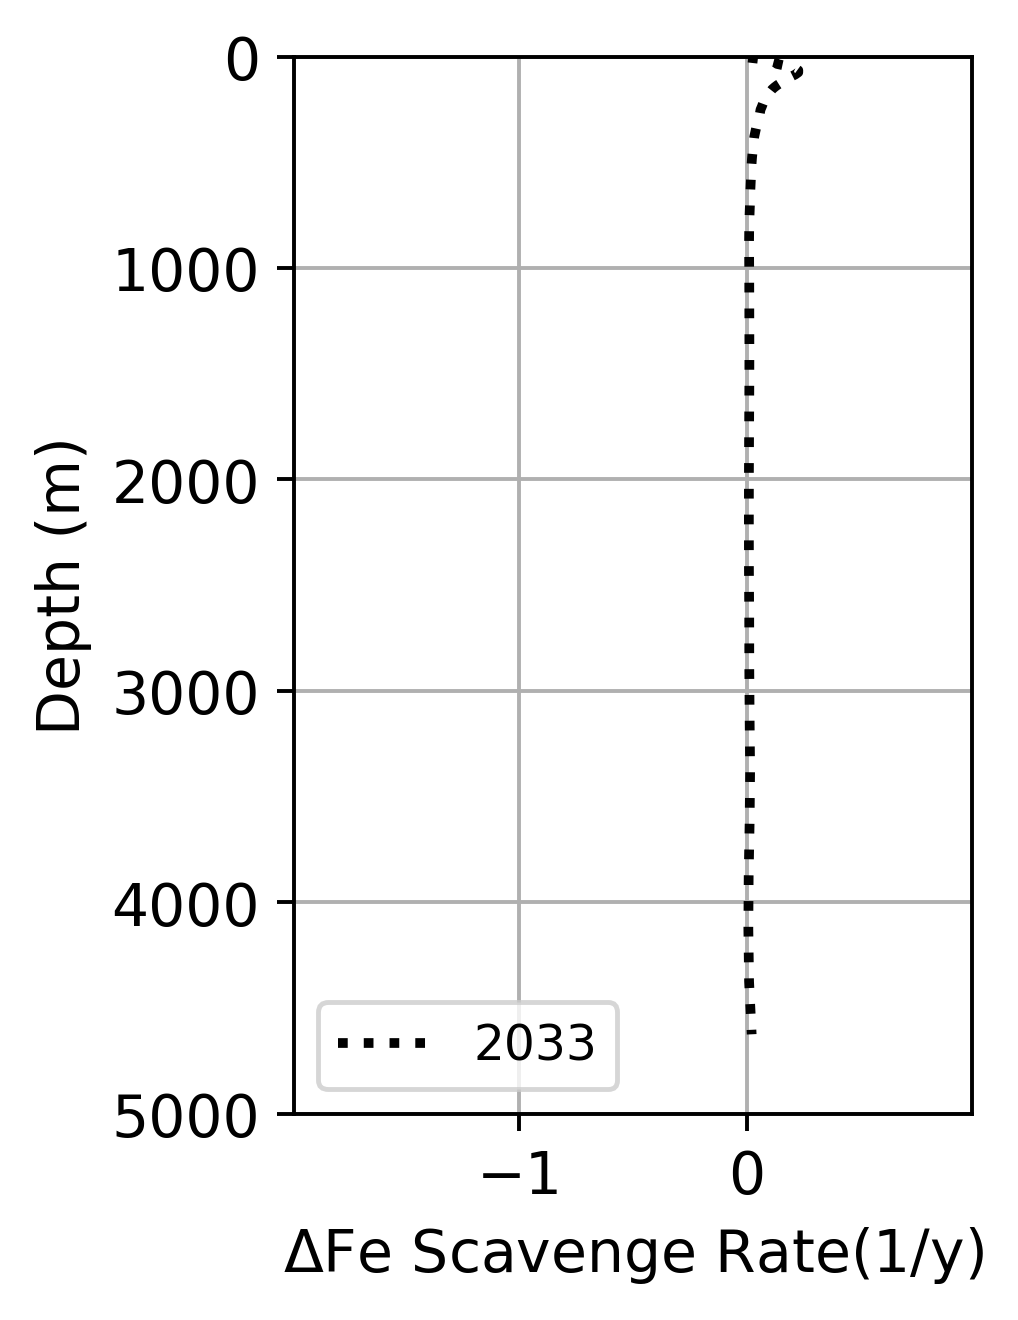

i:  14
double check date: UR:  2034-01-31 00:00:00  C:  2034-01-31 00:00:00


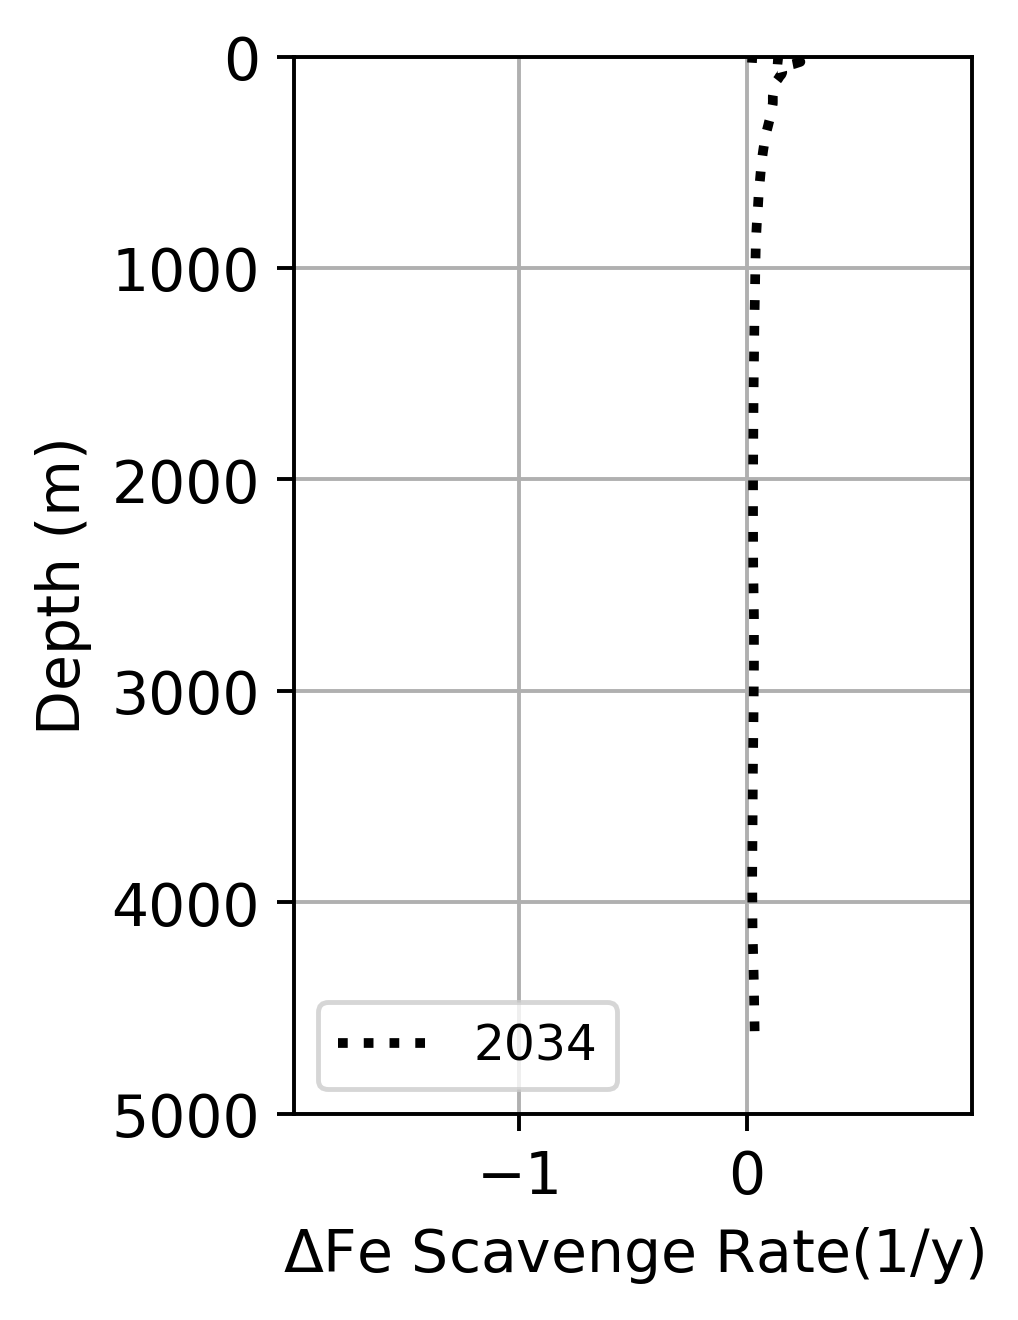

i:  15
double check date: UR:  2035-01-31 00:00:00  C:  2035-01-31 00:00:00


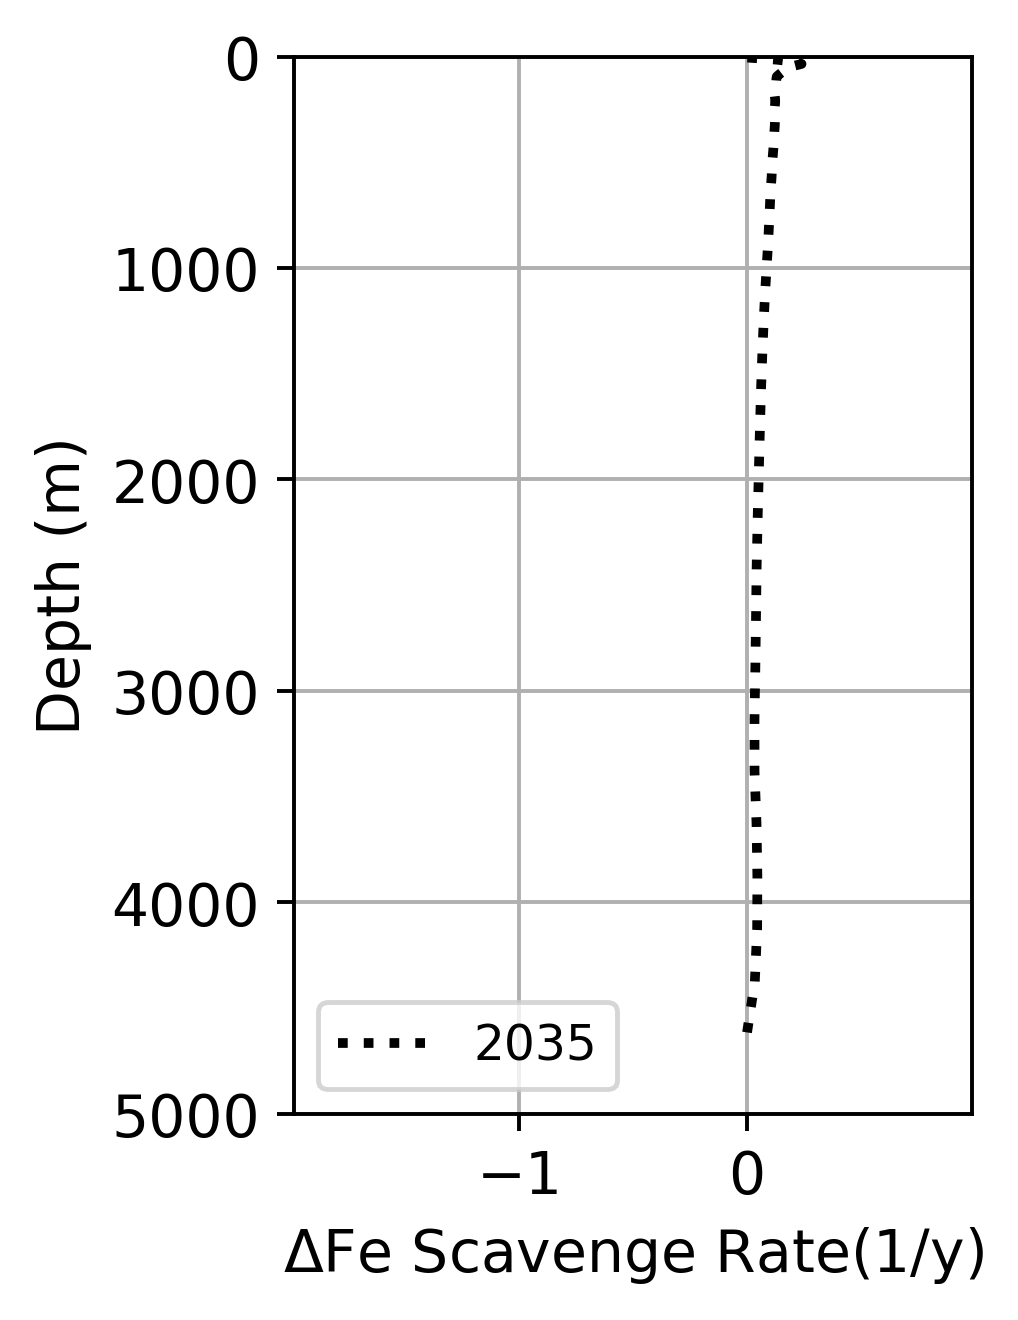

i:  16
double check date: UR:  2036-01-31 00:00:00  C:  2036-01-31 00:00:00


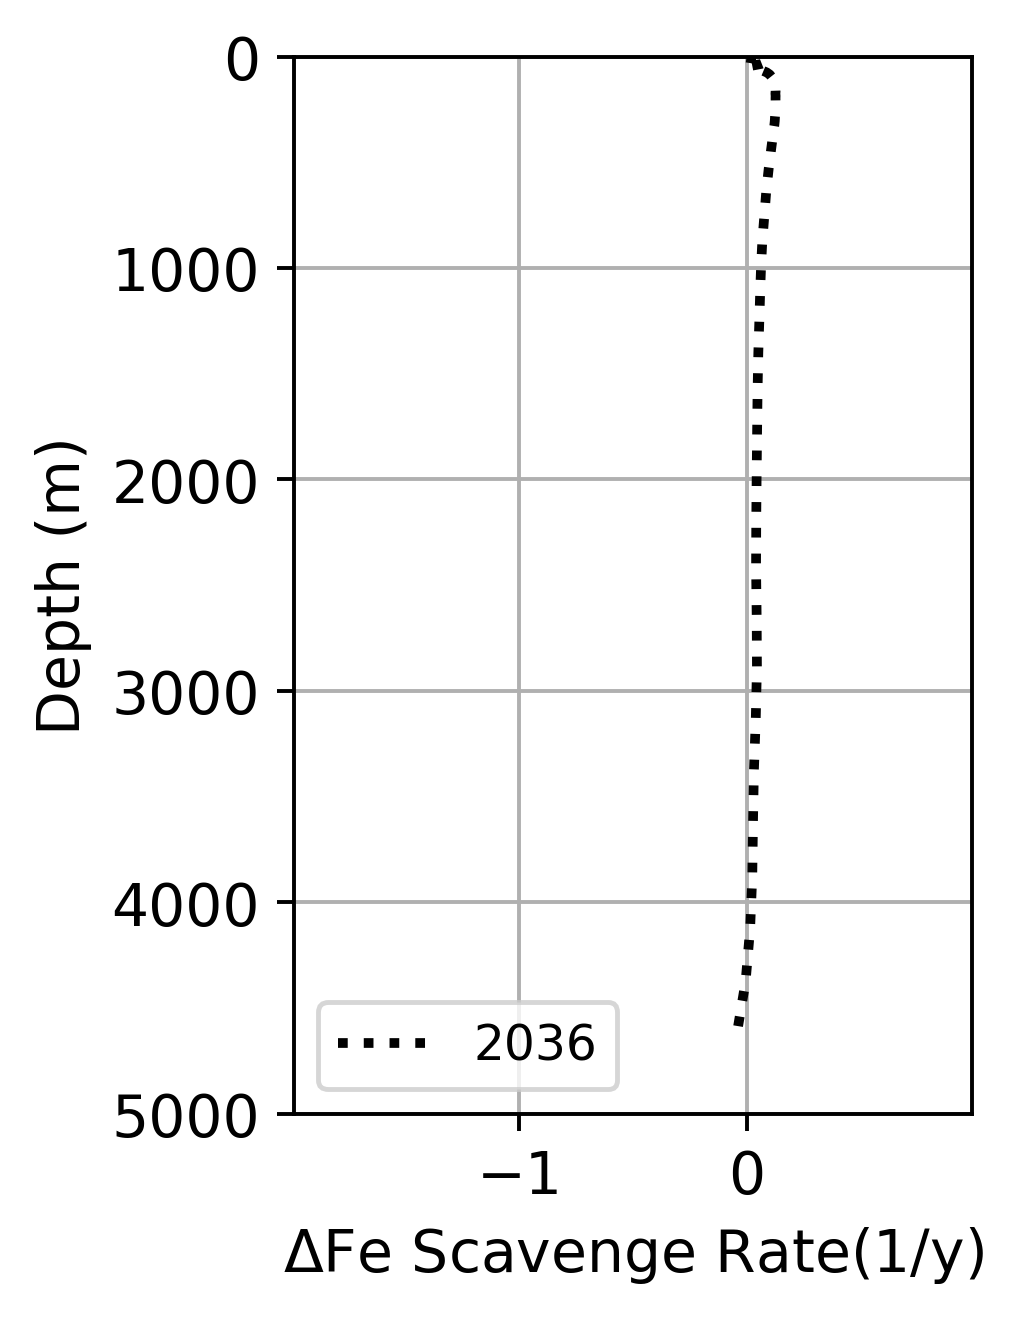

i:  17
double check date: UR:  2037-01-31 00:00:00  C:  2037-01-31 00:00:00


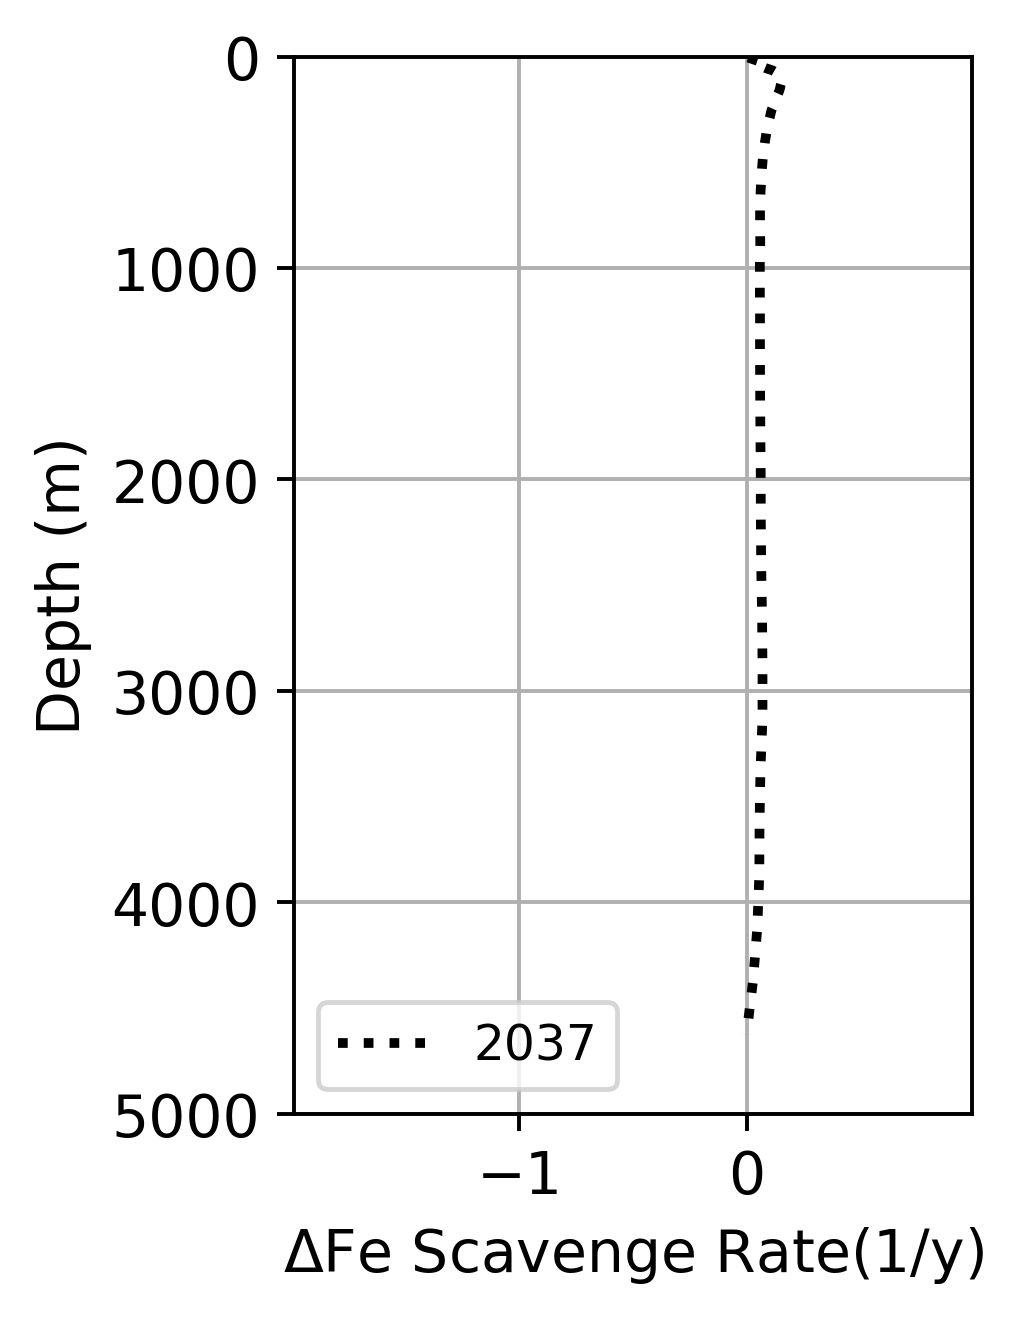

i:  18
double check date: UR:  2038-01-31 00:00:00  C:  2038-01-31 00:00:00


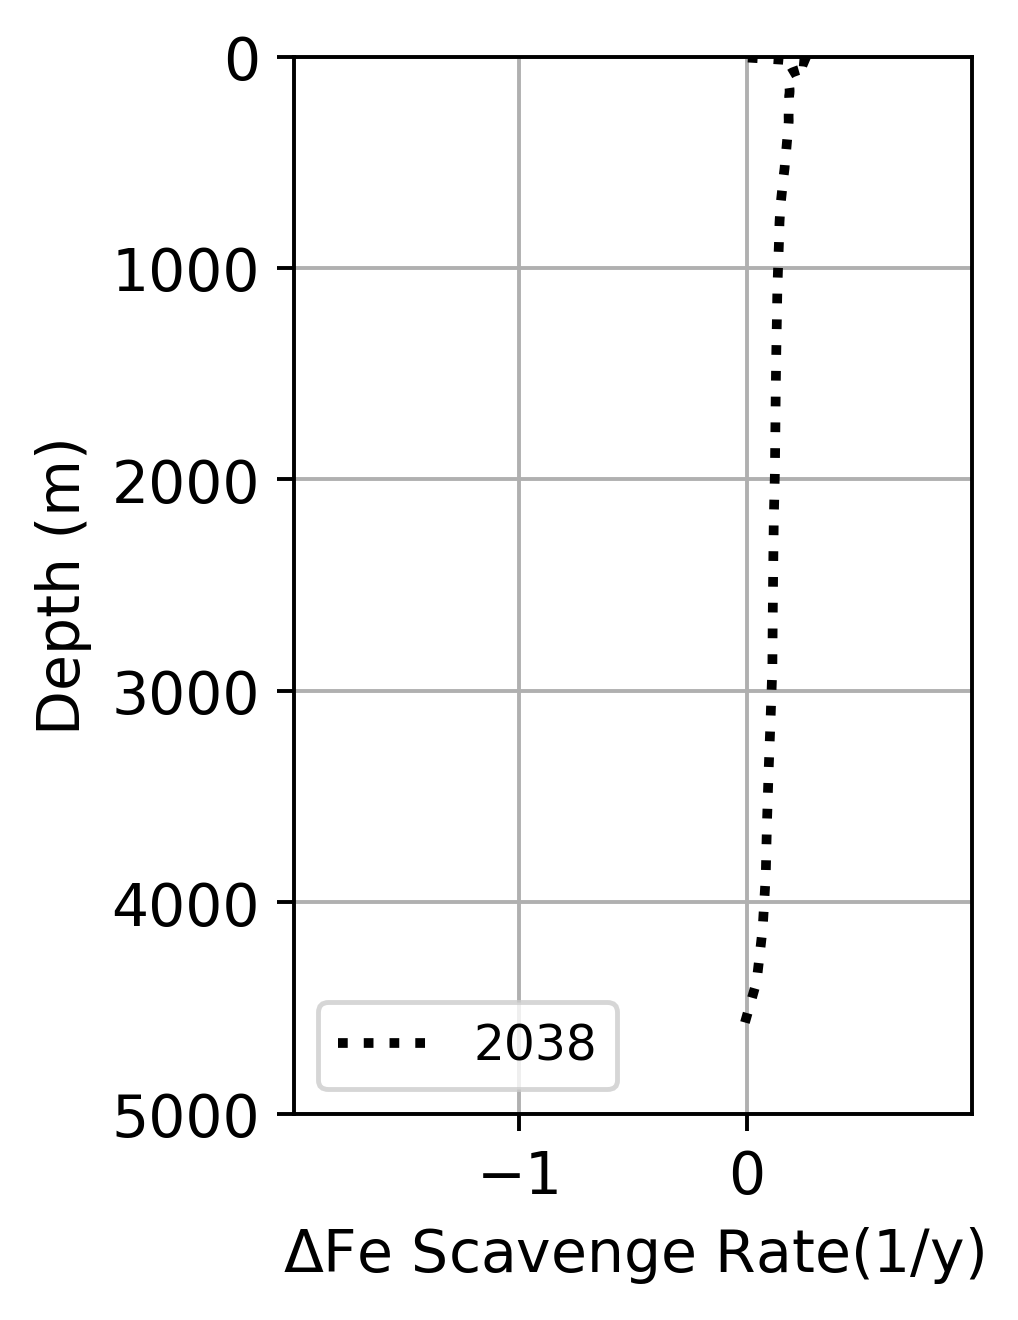

i:  19
double check date: UR:  2039-01-31 00:00:00  C:  2039-01-31 00:00:00


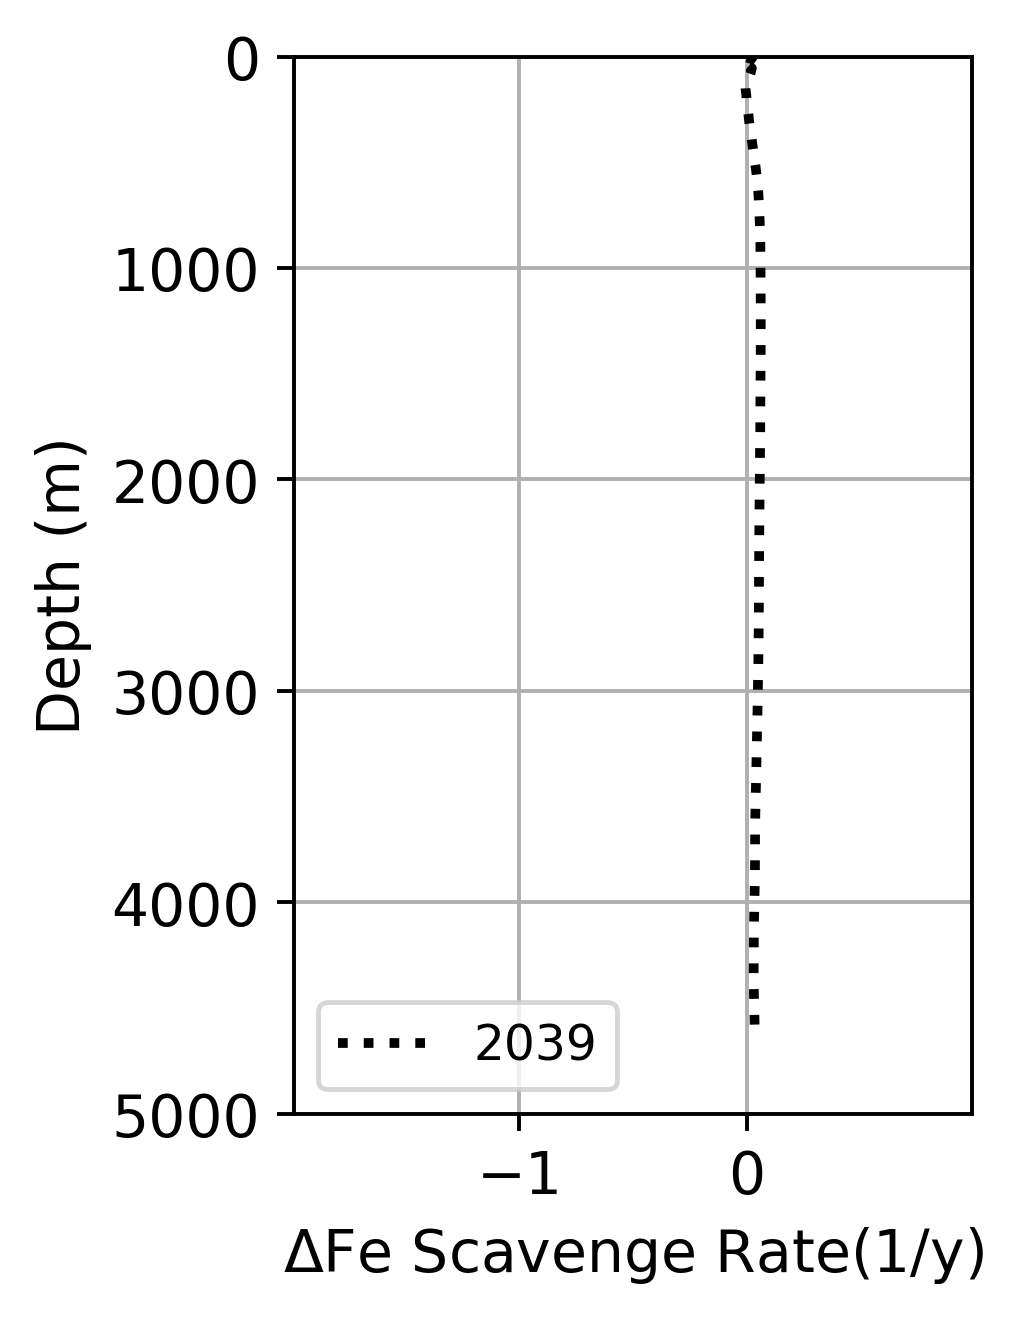

i:  20
double check date: UR:  2040-01-31 00:00:00  C:  2040-01-31 00:00:00


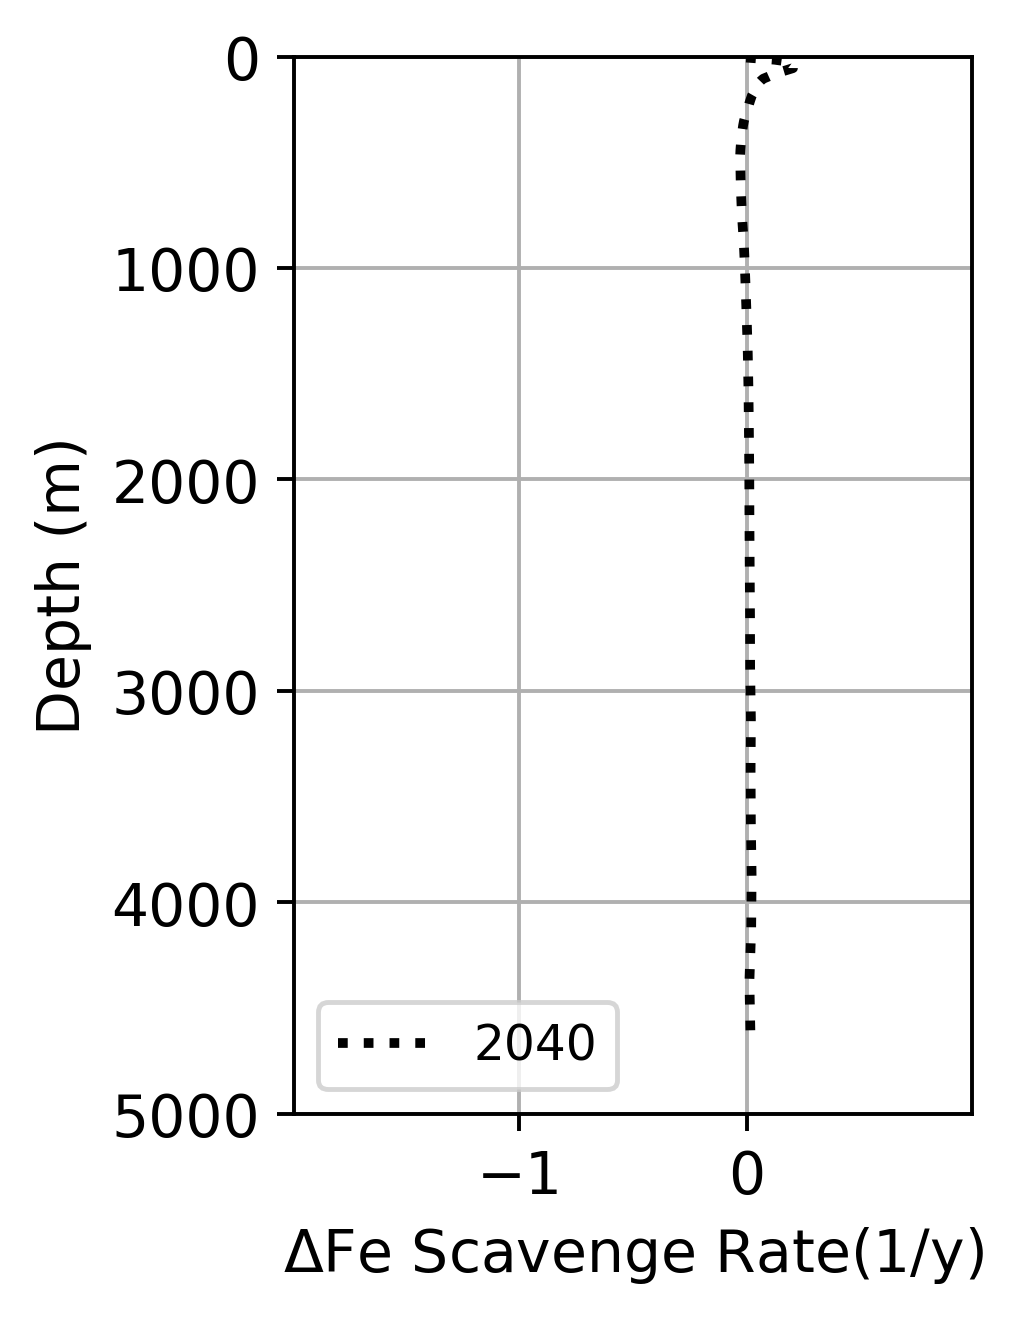

i:  21
double check date: UR:  2041-01-31 00:00:00  C:  2041-01-31 00:00:00


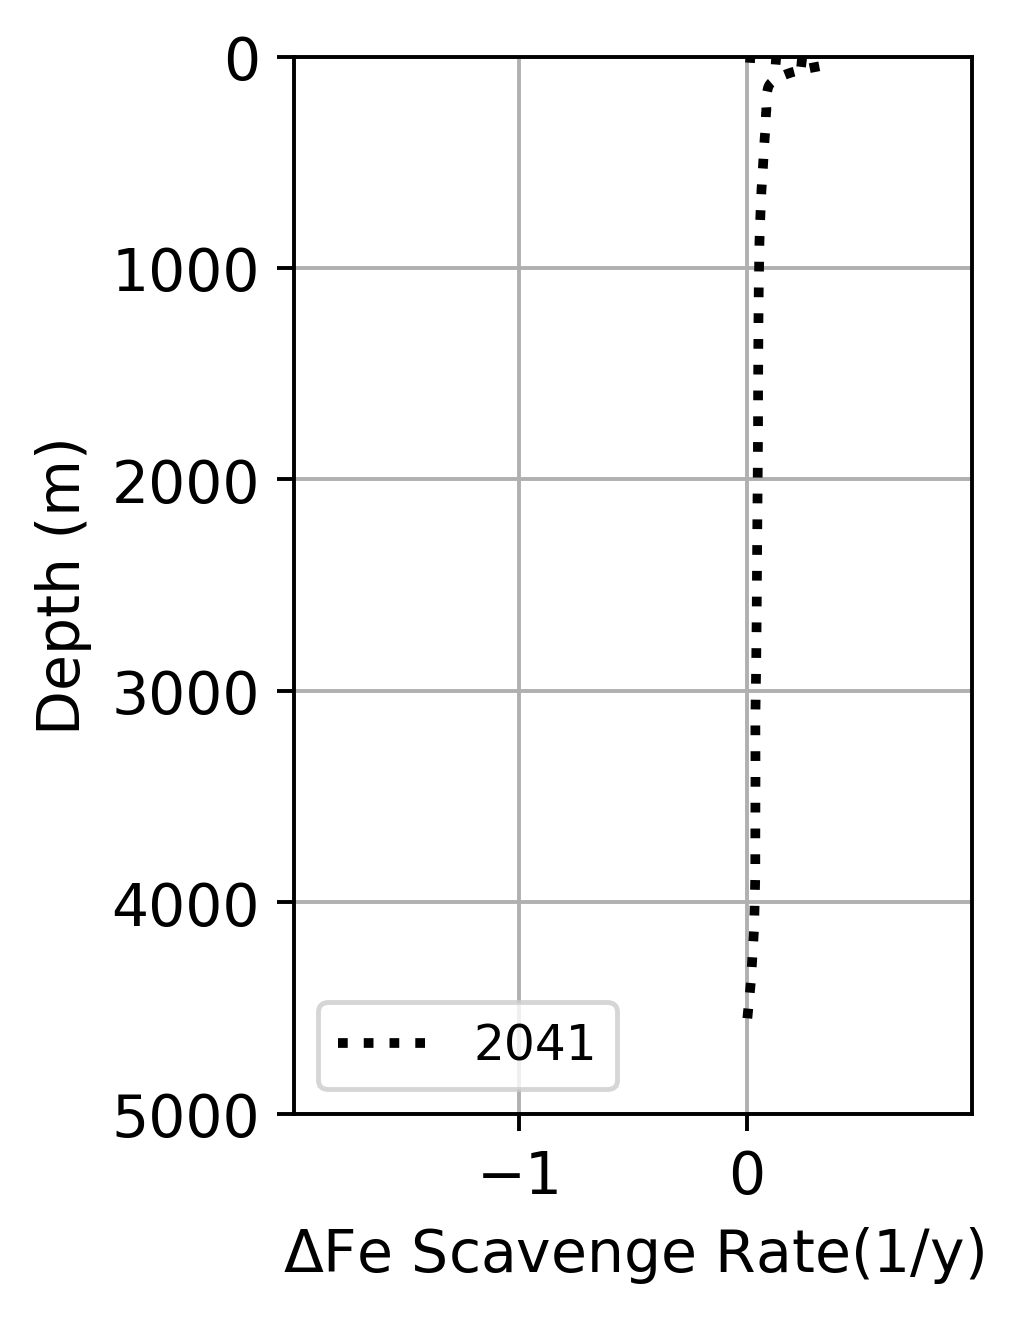

i:  22
double check date: UR:  2042-01-31 00:00:00  C:  2042-01-31 00:00:00


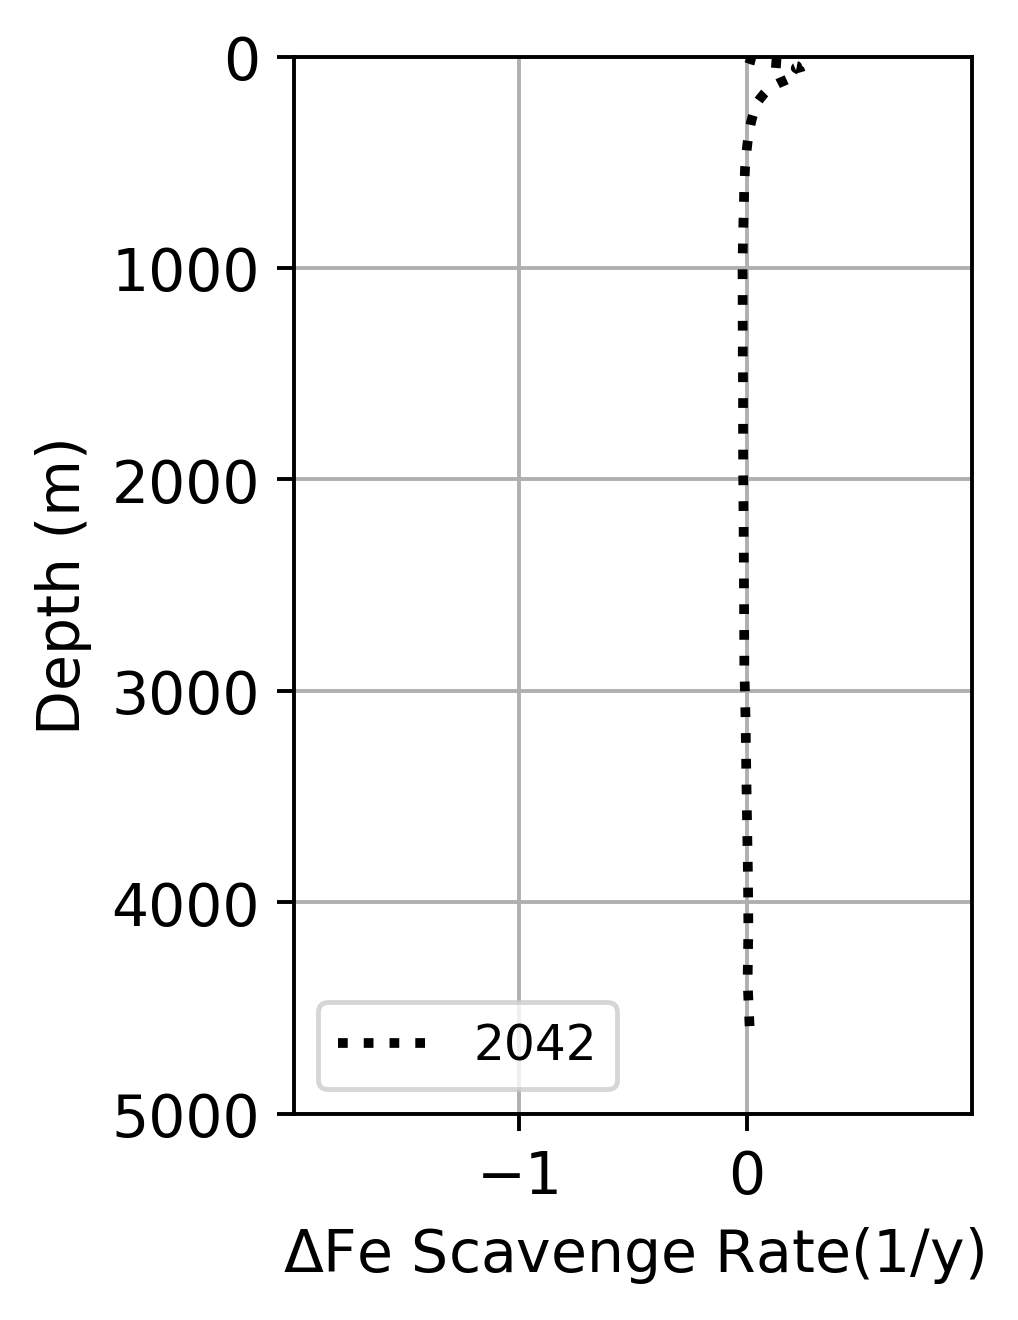

i:  23
double check date: UR:  2043-01-31 00:00:00  C:  2043-01-31 00:00:00


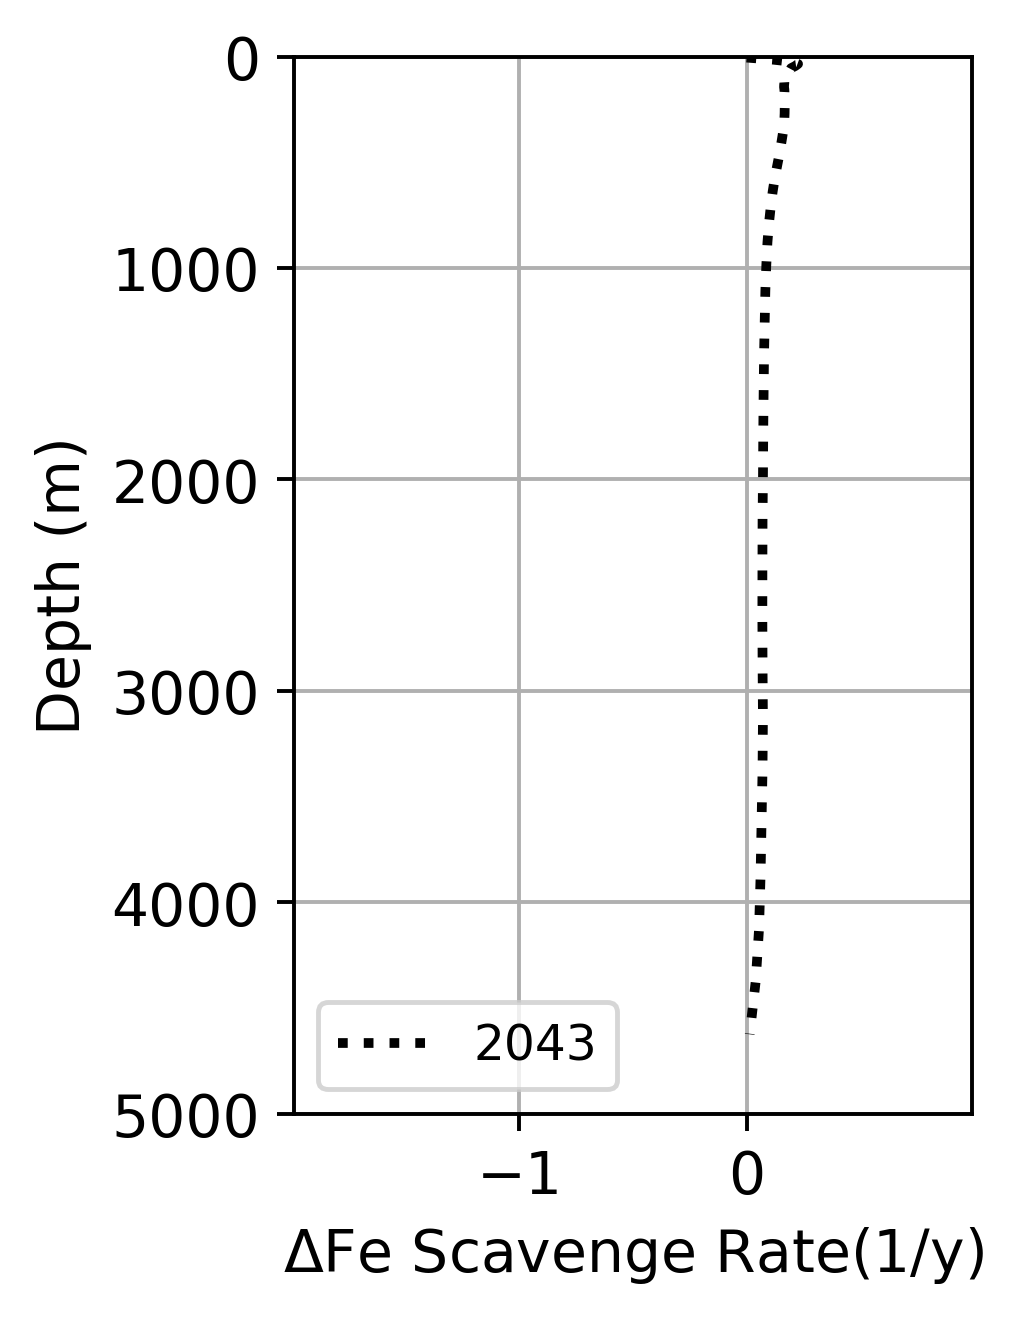

i:  24
double check date: UR:  2044-01-31 00:00:00  C:  2044-01-31 00:00:00


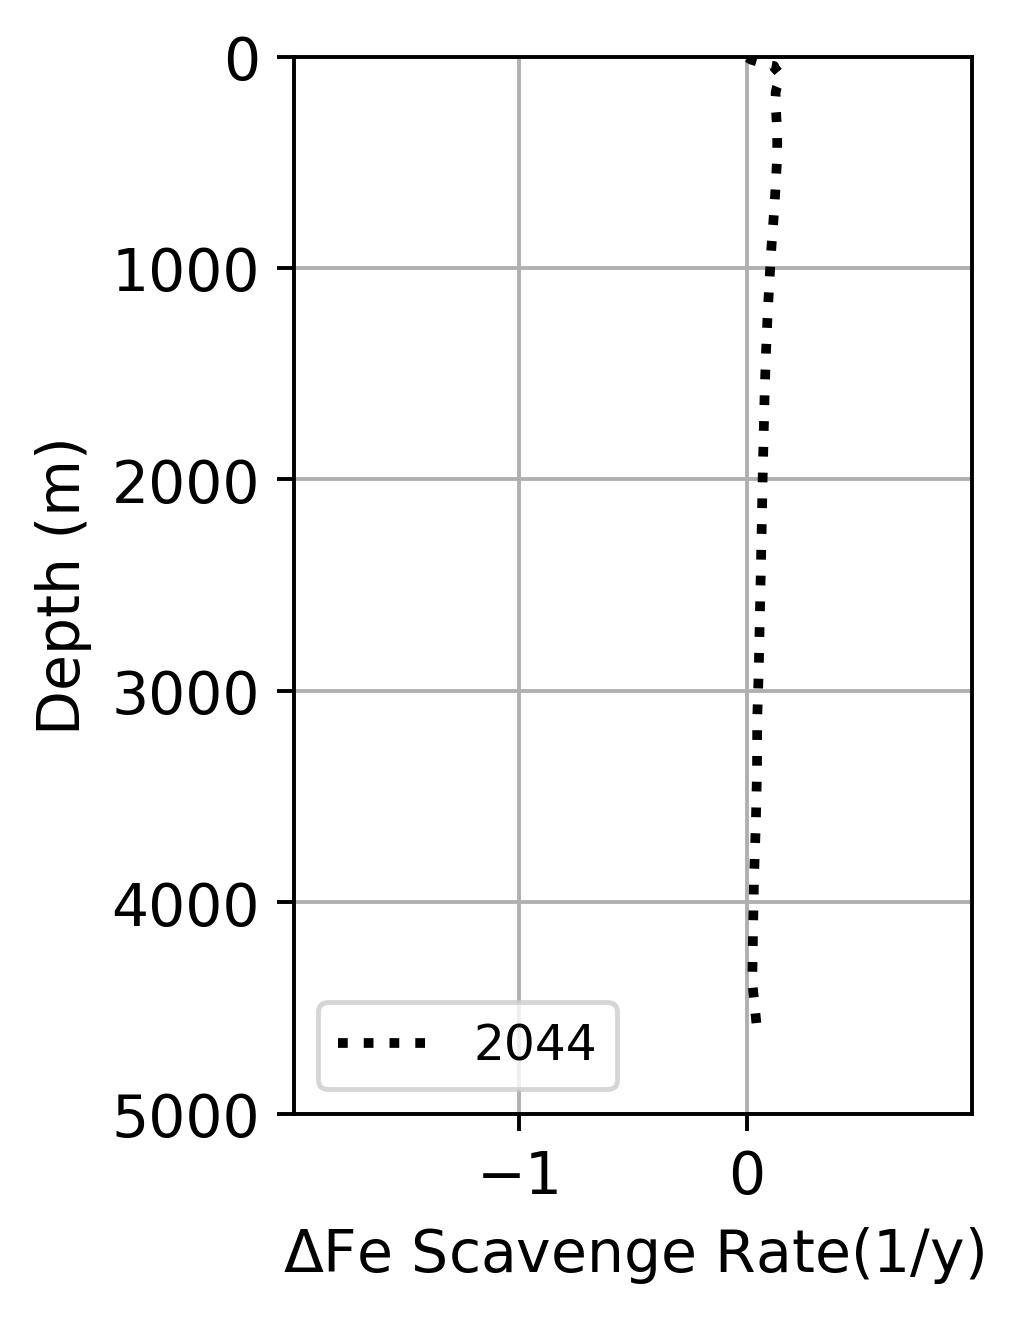

i:  25
double check date: UR:  2045-01-31 00:00:00  C:  2045-01-31 00:00:00


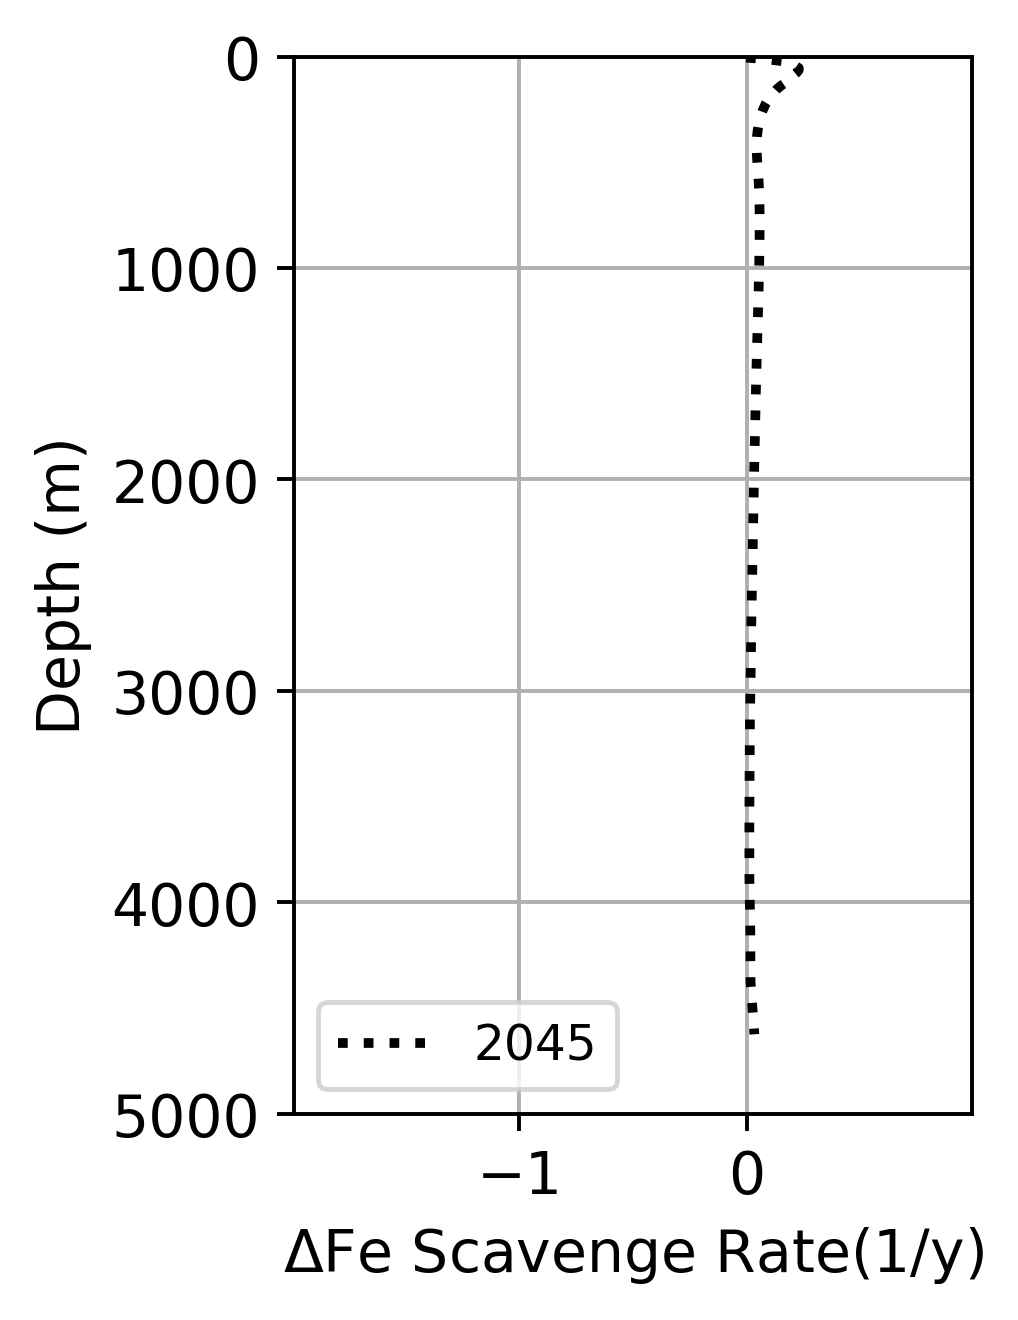

IndexError: index 26 is out of bounds for axis 0 with size 26

<Figure size 875x1400 with 0 Axes>

In [100]:
for i in range (0,28):
    fig= plt.figure(figsize=(2.5,4),facecolor = 'w')
    plt.plot(yr_150[i,:] - cntrl_yr[i,:] , z_t*0.01,'k:', label = 2020+i)
    
    plt.legend( loc='lower left',fontsize = '10')


    plt.gca().invert_yaxis()
    plt.grid()
    plt.ylim([5000,0])
    plt.xlim([-1.99,.99])
    plt.ylabel('Depth (m)')
    plt.xlabel('$\Delta$Fe Scavenge Rate(1/y)')

    print("i: ", i)
    print('double check date: UR: ', dates_UR[i*12], ' C: ', dates_c[i*12])
    plt.show()
       
    plt.close()

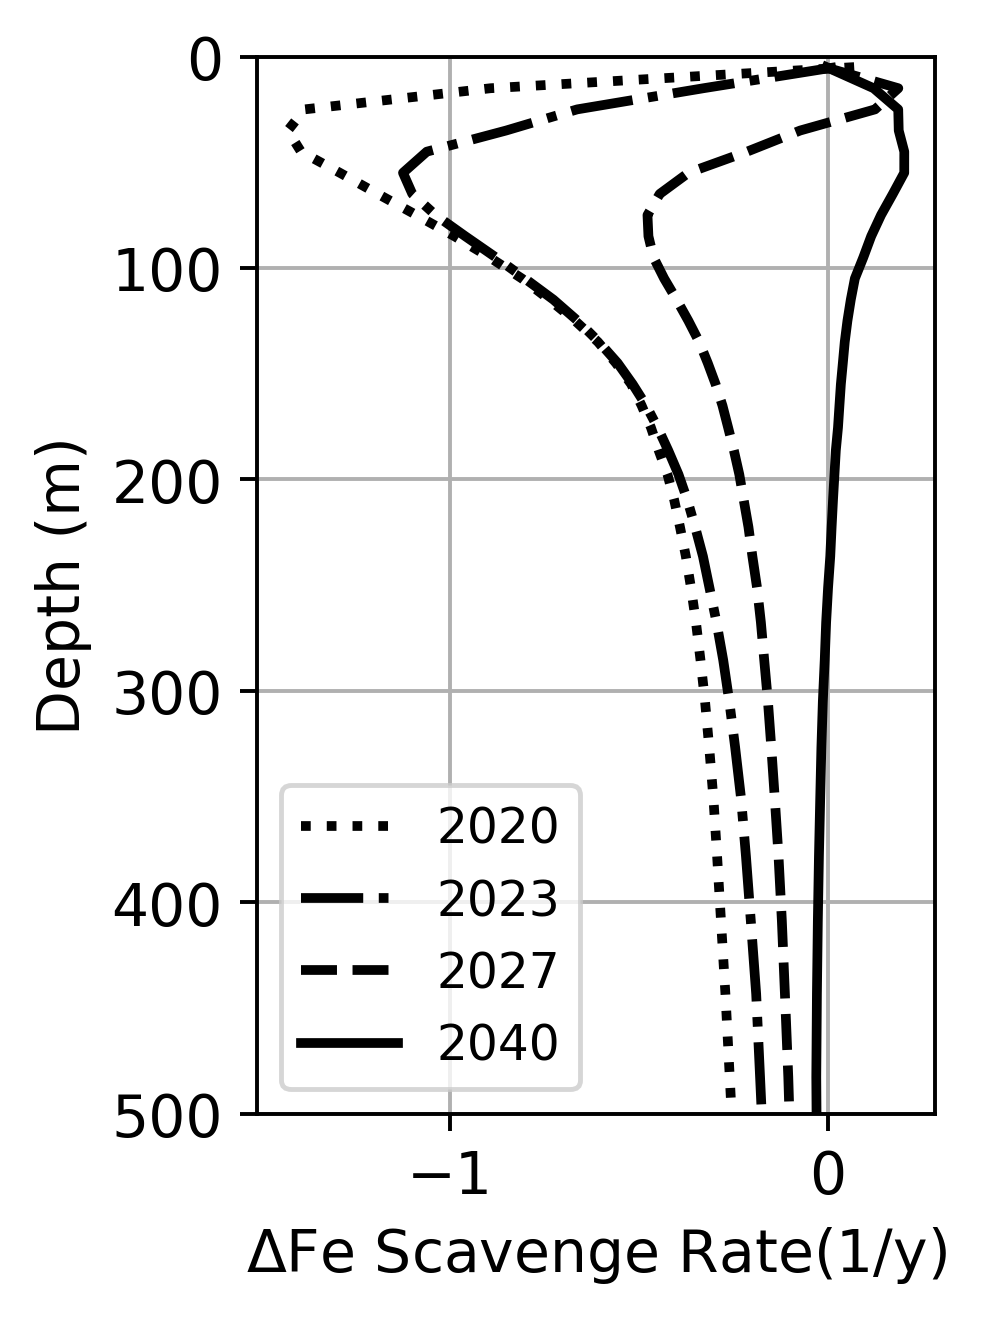

In [57]:
### Line Plot

fig= plt.figure(figsize=(2.5,4),facecolor = 'w')

plt.plot(reg_yr2020_UR_mean -reg_yr2020_mean , z_t*0.01,'k:', label = '2020')
plt.plot(reg_yr2023_UR_mean - reg_yr2023_cntrl_mean, z_t*0.01,'k-.', label = '2023')
plt.plot(reg_yr2027_UR_mean - reg_yr2027_cntrl_mean, z_t*0.01,'k--', label = '2027')
plt.plot(reg_yr2040_UR_mean - reg_yr2040_cntrl_mean, z_t*0.01,'k-', label = '2040')

plt.legend( loc='lower left',fontsize = '10')


plt.gca().invert_yaxis()
plt.grid()
plt.ylim([500,0])
plt.ylabel('Depth (m)')
plt.xlabel('$\Delta$Fe Scavenge Rate(1/y)')

plt.show()
fig.savefig('/glade/work/vgarza/nw_figures/Temp depth line plot up to 350 no negative x.jpg' , bbox_inches='tight')
plt.close()